In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import torch
from toolkit.training.initializer import allocate_gpu_memory
import time
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "3"
torch.cuda.set_device(3)
allocate_gpu_memory(0.4)

# Results

## BQ

### BERT

In [ ]:
# cu01

In [119]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/BQ/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05")
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "97 53 10 43 46"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = Path("outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
# metric_dicts.pop(10)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-05-06 22:01:52,861 <INFO> WatchDog: success/total: 8/8
{97: {'val': {'accuracy': 86.18, 'F1-score': 85.99, 'loss': 0.39},
      'test': {'accuracy': 85.32, 'F1-score': 85.26, 'loss': 0.42}},
 53: {'val': {'accuracy': 85.36, 'F1-score': 84.59, 'loss': 0.54},
      'test': {'accuracy': 85.25, 'F1-score': 84.62, 'loss': 0.52}},
 10: {'val': {'accuracy': 85.1, 'F1-score': 84.27, 'loss': 0.53},
      'test': {'accuracy': 84.36, 'F1-score': 83.64, 'loss': 0.54}},
 43: {'val': {'accuracy': 85.74, 'F1-score': 85.49, 'loss': 0.4},
      'test': {'accuracy': 85.38, 'F1-score': 85.19, 'loss': 0.42}},
 46: {'val': {'accuracy': 86.24, 'F1-score': 85.79, 'loss': 0.39},
      'test': {'accuracy': 85.09, 'F1-score': 84.78, 'loss': 0.42}}}
{'val': {'accuracy': 85.72, 'F1-score': 85.23, 'loss': 0.45},
 'test': {'accuracy': 85.08, 'F1-score': 84.7, 'loss': 0.46}}
---------TWR---------
2024-05-06 22:01:52,865 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  97 5

In [122]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
metric_for_compare = "accuracy"

ratio = 0.2
# times="None"

metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_only_pos_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
14 23 6 17 5
{97: {'val': {'acc_pipline': 86.43, 'f1_pipline': 86.08, 'accuracy': 85.91, 'F1-score': 85.6, 'loss': 2.09},
      'test': {'acc_pipline': 86.19, 'f1_pipline': 85.92, 'accuracy': 86.01, 'F1-score': 85.81, 'loss': 2.15}},
 53: {'val': {'acc_pipline': 86.22, 'f1_pipline': 85.72, 'accuracy': 85.52, 'F1-score': 85.21, 'loss': 2.26},
      'test': {'acc_pipline': 86.08, 'f1_pipline': 85.71, 'accuracy': 85.88, 'F1-score': 85.67, 'loss': 2.38}},
 10: {'val': {'acc_pipline': 86.24, 'f1_pipline': 85.78, 'accuracy': 85.62, 'F1-score': 85.35, 'loss': 2.09},
      'test': {'acc_pipline': 85.92, 'f1_pipline': 85.56, 'accuracy': 85.83, 'F1-score': 85.66, 'loss': 2.14}},
 43: {'val': {'acc_pipline': 86.29, 'f1_pipline': 86.0, 'accuracy': 85.96, 'F1-score': 85.81, 'loss': 1.93},
      'test': {'acc_pipline': 86.12, 'f1_pipline': 85.98, 'accuracy': 85.73, 'F1-score': 85.66, 'loss': 1.99}},
 46: {'val': {'acc_pipline': 86.23, 'f1_pipline': 85.88, 'accuracy': 85.59,

### MacBERT

In [ ]:
# cu01

In [25]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5


print("---------baseline---------")
seeds_dir = Path("outputs/BQ/chinese-macbert-base/ORI/all/Baseline_nodrop_baseline/3/16/2e-05")
# for seed_dir in seeds_dir.iterdir():
#     if int(seed_dir.name) not in metric_dicts.keys():
#         shutil.rmtree(seed_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir=seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# seeds = "97 53 10 43 46"
# metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = Path("outputs/BQ/chinese-macbert-base/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/2e-05")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
# metric_dicts.pop(10)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-05-05 17:01:03,629 <INFO> WatchDog: success/total: 5/5
{118: {'val': {'accuracy': 85.72, 'F1-score': 85.24, 'loss': 0.5},
       'test': {'accuracy': 85.65, 'F1-score': 85.34, 'loss': 0.5}},
 149: {'val': {'accuracy': 85.63, 'F1-score': 85.21, 'loss': 0.41},
       'test': {'accuracy': 85.44, 'F1-score': 85.17, 'loss': 0.42}},
 43: {'val': {'accuracy': 85.55, 'F1-score': 85.52, 'loss': 0.42},
      'test': {'accuracy': 85.08, 'F1-score': 85.29, 'loss': 0.43}},
 107: {'val': {'accuracy': 85.41, 'F1-score': 84.78, 'loss': 0.53},
       'test': {'accuracy': 84.98, 'F1-score': 84.54, 'loss': 0.52}},
 12: {'val': {'accuracy': 85.87, 'F1-score': 85.3, 'loss': 0.51},
      'test': {'accuracy': 84.63, 'F1-score': 84.14, 'loss': 0.53}}}
{'val': {'accuracy': 85.64, 'F1-score': 85.21, 'loss': 0.47},
 'test': {'accuracy': 85.16, 'F1-score': 84.9, 'loss': 0.48}}
---------TWR---------
2024-05-05 17:01:03,634 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1: 

In [26]:
" ".join(map(str, range(100, 130)))

'100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129'

In [27]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
# metric_for_compare = "accuracy"

times = "0.1"
ratio = 0.2
# times="None"

metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/BQ/chinese-macbert-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_only_pos_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-05"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
48 149 15 149 43
{118: {'val': {'acc_pipline': 86.31, 'f1_pipline': 85.96, 'accuracy': 85.57, 'F1-score': 85.37, 'loss': 2.19},
       'test': {'acc_pipline': 86.31, 'f1_pipline': 86.15, 'accuracy': 86.07, 'F1-score': 86.02, 'loss': 2.21}},
 43: {'val': {'acc_pipline': 86.11, 'f1_pipline': 85.99, 'accuracy': 85.77, 'F1-score': 85.68, 'loss': 1.89},
      'test': {'acc_pipline': 86.4, 'f1_pipline': 86.33, 'accuracy': 85.74, 'F1-score': 85.77, 'loss': 1.94}},
 149: {'val': {'acc_pipline': 86.35, 'f1_pipline': 86.16, 'accuracy': 85.84, 'F1-score': 85.76, 'loss': 1.9},
       'test': {'acc_pipline': 85.94, 'f1_pipline': 85.75, 'accuracy': 85.31, 'F1-score': 85.25, 'loss': 1.95}},
 12: {'val': {'acc_pipline': 86.67, 'f1_pipline': 86.44, 'accuracy': 86.06, 'F1-score': 85.82, 'loss': 1.71},
      'test': {'acc_pipline': 85.75, 'f1_pipline': 85.63, 'accuracy': 85.14, 'F1-score': 84.98, 'loss': 1.81}},
 107: {'val': {'acc_pipline': 86.17, 'f1_pipline': 86.22, 'accuracy

-------------

In [2]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/BQ/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05")
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "97 53 10 43 46"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = Path("outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
# metric_dicts.pop(10)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


# best_seeds_of_stage1 = list(best_seeds_of_stage1)[1:]
print("---------TWR-P---------")
# bad: 0.33 0.1 5
times = 0.1  # add_badcases 没用
ratio = 0.2
# times="10" # bad: 3
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    # seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_only_pos/seed_of_stage1={seed_of_stage1}/1/16/3e-05"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

[2024-04-23 02:29:20,786] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)
---------baseline---------
2024-04-23 02:29:27,209 <INFO> WatchDog: success/total: 8/8
{97: {'val': {'accuracy': 86.18, 'F1-score': 85.99, 'loss': 0.39},
      'test': {'accuracy': 85.32, 'F1-score': 85.26, 'loss': 0.42}},
 53: {'val': {'accuracy': 85.36, 'F1-score': 84.59, 'loss': 0.54},
      'test': {'accuracy': 85.25, 'F1-score': 84.62, 'loss': 0.52}},
 10: {'val': {'accuracy': 85.1, 'F1-score': 84.27, 'loss': 0.53},
      'test': {'accuracy': 84.36, 'F1-score': 83.64, 'loss': 0.54}},
 43: {'val': {'accuracy': 85.74, 'F1-score': 85.49, 'loss': 0.4},
      'test': {'accuracy': 85.38, 'F1-score': 85.19, 'loss': 0.42}},
 46: {'val': {'accuracy': 86.24, 'F1-score': 85.79, 'loss': 0.39},
      'test': {'accuracy': 85.09, 'F1-score': 84.78, 'loss': 0.42}}}
{'val': {'accuracy': 85.72, 'F1-score': 85.23, 'loss': 0.45},
 'test': {'accuracy': 85.08, 'F1-score': 84.7, 'loss'

In [3]:
print("---------TWR-H---------")
times = "0.1"
ratio = 0.2
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

---------TWR-H---------
2024-04-23 02:29:37,451 <DEBUG> WatchDog: ❌ Failed: outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes=0.1/seed_of_stage1=97/1/16/3e-05/69
22 4 5 63 52
{97: {'val': {'accuracy': 85.7, 'F1-score': 85.35, 'loss': 2.07},
      'test': {'accuracy': 85.83, 'F1-score': 85.61, 'loss': 2.11}},
 10: {'val': {'accuracy': 85.46, 'F1-score': 85.11, 'loss': 2.17},
      'test': {'accuracy': 85.64, 'F1-score': 85.36, 'loss': 2.21}},
 53: {'val': {'accuracy': 85.44, 'F1-score': 85.09, 'loss': 2.07},
      'test': {'accuracy': 85.63, 'F1-score': 85.38, 'loss': 2.14}},
 43: {'val': {'accuracy': 85.53, 'F1-score': 85.2, 'loss': 2.03},
      'test': {'accuracy': 85.6, 'F1-score': 85.34, 'loss': 2.05}},
 46: {'val': {'accuracy': 85.7, 'F1-score': 85.5, 'loss': 1.91},
      'test': {'accuracy': 85.48, 'F1-score': 85.4, 'loss': 1.97}}}
{'val': {'accuracy': 85.57, 'F1-score': 85.25, 'loss': 2.05},
 'test': 

In [7]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/BQ/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
pp(metric_dict_topk)
pp(mean)
# pp({seed:metric_dicts[seed] for seed in map(int, '149 109 97 43 137'.split())})
# seeds="68 149 109 97 43"
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])

print("---------single_model---------")
seeds_dir = Path("outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TIWR_nodrop_single_model/3/16/3e-05")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dicts.pop(10)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


# best_seeds_of_stage1 = list(best_seeds_of_stage1)[1:]
print("---------rephrase_hardcases_warmboost---------")
# bad: 0.33 0.1 5
times = 0.1  # add_badcases 没用
# times=7
# ratio = 0.8
# times="10" # bad: 3
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TIWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    # seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TIWR-P_nodrop_single_model_hardcases_from_baseline_no_balance_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-04-14 14:52:54,170 <INFO> WatchDog: success/total: 6/6
{43: {'val': {'accuracy': 85.74, 'F1-score': 85.49, 'loss': 0.4},
      'test': {'accuracy': 85.38, 'F1-score': 85.19, 'loss': 0.42}},
 97: {'val': {'accuracy': 86.18, 'F1-score': 85.99, 'loss': 0.39},
      'test': {'accuracy': 85.32, 'F1-score': 85.26, 'loss': 0.42}},
 149: {'val': {'accuracy': 85.52, 'F1-score': 84.85, 'loss': 0.44},
       'test': {'accuracy': 85.23, 'F1-score': 84.67, 'loss': 0.45}},
 68: {'val': {'accuracy': 85.96, 'F1-score': 85.65, 'loss': 0.44},
      'test': {'accuracy': 85.05, 'F1-score': 84.84, 'loss': 0.46}},
 109: {'val': {'accuracy': 86.14, 'F1-score': 86.22, 'loss': 0.41},
       'test': {'accuracy': 84.87, 'F1-score': 85.1, 'loss': 0.44}}}
{'val': {'accuracy': 85.91, 'F1-score': 85.64, 'loss': 0.42},
 'test': {'accuracy': 85.17, 'F1-score': 85.01, 'loss': 0.44}}
---------single_model---------
2024-04-14 14:52:54,174 <INFO> WatchDog: success/total: 6/6
best_sedds_of_s

In [14]:
print("---------TIWR-H---------")
times = "0.1"
ratio = 0.2
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    # seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

---------TIWR-H---------
109 42 16 11 42
{149: {'val': {'accuracy': 86.29, 'F1-score': 85.99, 'loss': 1.95},
       'test': {'accuracy': 85.89, 'F1-score': 85.62, 'loss': 2.02}},
 97: {'val': {'accuracy': 86.01, 'F1-score': 85.74, 'loss': 2.07},
      'test': {'accuracy': 85.83, 'F1-score': 85.6, 'loss': 2.12}},
 43: {'val': {'accuracy': 85.84, 'F1-score': 85.58, 'loss': 1.96},
      'test': {'accuracy': 85.71, 'F1-score': 85.45, 'loss': 2.04}},
 109: {'val': {'accuracy': 86.22, 'F1-score': 86.04, 'loss': 1.78},
       'test': {'accuracy': 85.7, 'F1-score': 85.56, 'loss': 1.85}},
 68: {'val': {'accuracy': 86.31, 'F1-score': 85.86, 'loss': 2.12},
      'test': {'accuracy': 85.46, 'F1-score': 85.09, 'loss': 2.25}}}
{'val': {'accuracy': 86.13, 'F1-score': 85.84, 'loss': 1.98},
 'test': {'accuracy': 85.72, 'F1-score': 85.46, 'loss': 2.06}}


In [ ]:
# JUST_DATA_AUG_REP4
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k=5
seeds = '68 149 109 97 43'

print("---------JUST_DATA_AUG_ORI---------")
seeds_dir = "outputs/BQ/bert-base-chinese/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/3e-05"

seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1)>=5:
    for seed_dir in seeds_dir.iterdir():
        if seed_dir.name in seeds.split():
            continue
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
# print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# pp(metric_dict_topk)
pp(mean)
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])

# # print("---------JUST_DATA_AUG_REP4---------")
# seeds_dir = "outputs/BQ/bert-base-chinese/JUST_DATA_AUG_REP4/all/nodrop_single_model/3/64/3e-05"
# seeds_dir = Path(seeds_dir)
# metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# best_seeds_of_stage1 = metric_dict_topk.keys()
# if len(best_seeds_of_stage1)>=5:
#     for seed_dir in seeds_dir.iterdir():
#         if seed_dir.name in seeds.split():
#             continue
#         if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
#             shutil.rmtree(seed_dir)
# print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# # pp(metric_dict_topk)
# pp(mean)
# # pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])

---------JUST_DATA_AUG_ORI---------
2024-02-08 13:23:48,871 <INFO> WatchDog: success/total: 5/5
{'val': {'accuracy': 86.01, 'F1-score': 85.47, 'loss': 2.54},
 'test': {'accuracy': 85.13, 'F1-score': 84.59, 'loss': 2.6}}


In [ ]:
# JUST_DATA_AUG_REP4
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5
seeds = "68 149 109 97 43"

print("---------JUST_DATA_AUG_ORI---------")
seeds_dir = "outputs/BQ/bert-base-chinese/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/64/3e-05"

seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 5:
    for seed_dir in seeds_dir.iterdir():
        if seed_dir.name in seeds.split():
            continue
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
# print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# pp(metric_dict_topk)
pp(mean)

---------JUST_DATA_AUG_ORI---------
2024-03-27 13:23:48,694 <INFO> WatchDog: success/total: 5/5
{'val': {'accuracy': 85.81, 'F1-score': 85.29, 'loss': 2.39},
 'test': {'accuracy': 85.25, 'F1-score': 84.76, 'loss': 2.4}}


In [ ]:
# contrast_only + after_contrast

from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k=5

print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/BQ/bert-base-chinese/ORI/all/nodrop_baseline/3/16/3e-05")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
pp(mean)
# pp({seed:metric_dicts[seed] for seed in map(int, '149 109 97 43 137'.split())})
pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, '97 43 19 53 109'.split())})[1])

print("---------contrast_only---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/single_model_contrast_only_margin=1/1/16/1e-05")
# metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/single_model_contrast_only2_margin=0/1/16/3e-05")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
pp(mean)
# pp(metric_dict_topk)
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, '29 109 103 151 79'.split())})[1])

print("---------single_model---------")
seeds_dir = "outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_after_contrast_margin=1/3/16/3e-05"
# seeds_dir = "outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_after_contrast2_margin=0/3/16/3e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
# if len(best_seeds_of_stage1)>=5:
#     for seed_dir in seeds_dir.iterdir():
#         if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
#             shutil.rmtree(seed_dir)
print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


# # best_seeds_of_stage1 = list(best_seeds_of_stage1)[:4]
# print("---------rephrase_hardcases_warmboost---------")
# times="10"
# ratio=1
# # times="None"
# metric_dicts = dict()
# for seed_of_stage1 in best_seeds_of_stage1:
#     # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
#     seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    
#     seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
#     # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
#     seeds_dir = f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_after_contrast_margin=1_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

#     # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/s2m_multi_model_shareclassifier_hardcases_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
#     # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/s2m_multi_model_shareclassifier_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"

#     seeds_dir = Path(seeds_dir)
#     _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
#     _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
#     if _mean:
#         metric_dicts[seed_of_stage1] = _mean
#         best_seed = list(_metric_dict_topk.keys())[0]
#         for seed_dir in seeds_dir.iterdir():
#             if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
#                 shutil.rmtree(seed_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
# pp(metric_dict_topk)
# pp(mean)

---------baseline---------
2024-01-31 17:01:05,298 <INFO> WatchDog: success/total: 23/23
{'val': {'accuracy': 86.1, 'F1-score': 85.71, 'loss': 0.45},
 'test': {'accuracy': 85.41, 'F1-score': 85.13, 'loss': 0.46},
 'cheat': {'accuracy': 85.46, 'F1-score': 85.24, 'loss': 0.43}}
{'val': {'accuracy': 85.81, 'F1-score': 85.37, 'loss': 0.43},
 'test': {'accuracy': 84.95, 'F1-score': 84.57, 'loss': 0.45},
 'cheat': {'accuracy': 85.1, 'F1-score': 84.68, 'loss': 0.46}}
---------contrast_only---------
2024-01-31 17:01:05,304 <INFO> WatchDog: success/total: 8/8


{'val': {'loss': 0.82}, 'test': {'loss': 0.82}, 'cheat': {'loss': 0.82}}
---------single_model---------
2024-01-31 17:01:05,314 <INFO> WatchDog: success/total: 40/40
best_sedds_of_stage1:  97 43 19 53 109
{97: {'val': {'accuracy': 86.62, 'F1-score': 86.23, 'loss': 2.18},
      'test': {'accuracy': 86.26, 'F1-score': 85.96, 'loss': 2.27}},
 43: {'val': {'accuracy': 86.45, 'F1-score': 86.23, 'loss': 1.75},
      'test': {'accuracy': 86.23, 'F1-score': 86.08, 'loss': 1.74}},
 19: {'val': {'accuracy': 86.35, 'F1-score': 85.75, 'loss': 2.26},
      'test': {'accuracy': 86.15, 'F1-score': 85.65, 'loss': 2.27}},
 53: {'val': {'accuracy': 86.12, 'F1-score': 85.55, 'loss': 2.28},
      'test': {'accuracy': 86.05, 'F1-score': 85.49, 'loss': 2.27}},
 109: {'val': {'accuracy': 86.66, 'F1-score': 86.25, 'loss': 1.66},
       'test': {'accuracy': 85.99, 'F1-score': 85.6, 'loss': 1.69}}}
{'val': {'accuracy': 86.44, 'F1-score': 86.0, 'loss': 2.03},
 'test': {'accuracy': 86.14, 'F1-score': 85.76, 'loss

## LCQMC

### BERT

In [ ]:
# cu13

In [217]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05")
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "29 109 38 14 44"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-05-06 14:37:52,348 <INFO> WatchDog: success/total: 8/8
{29: {'val': {'accuracy': 89.18, 'F1-score': 89.09, 'loss': 0.3},
      'test': {'accuracy': 88.06, 'F1-score': 88.66, 'loss': 0.29}},
 109: {'val': {'accuracy': 88.67, 'F1-score': 88.84, 'loss': 0.34},
       'test': {'accuracy': 86.52, 'F1-score': 87.55, 'loss': 0.36}},
 38: {'val': {'accuracy': 88.64, 'F1-score': 88.8, 'loss': 0.35},
      'test': {'accuracy': 86.39, 'F1-score': 87.49, 'loss': 0.37}},
 14: {'val': {'accuracy': 88.88, 'F1-score': 89.09, 'loss': 0.35},
      'test': {'accuracy': 86.56, 'F1-score': 87.61, 'loss': 0.38}},
 44: {'val': {'accuracy': 88.31, 'F1-score': 88.49, 'loss': 0.35},
      'test': {'accuracy': 86.32, 'F1-score': 87.44, 'loss': 0.37}}}
{'val': {'accuracy': 88.74, 'F1-score': 88.86, 'loss': 0.34},
 'test': {'accuracy': 86.77, 'F1-score': 87.75, 'loss': 0.35}}
---------TWR---------
2024-05-06 14:37:52,381 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  2

In [218]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
metric_for_compare = "accuracy"

ratio = 0.8
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_only_pos_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
0 77 0 0 77
{29: {'val': {'acc_pipline': 90.67, 'f1_pipline': 90.43, 'accuracy': 89.92, 'F1-score': 89.36, 'loss': 1.25},
      'test': {'acc_pipline': 89.5, 'f1_pipline': 89.65, 'accuracy': 89.6, 'F1-score': 89.38, 'loss': 1.16}},
 38: {'val': {'acc_pipline': 90.16, 'f1_pipline': 89.93, 'accuracy': 89.74, 'F1-score': 89.2, 'loss': 1.25},
      'test': {'acc_pipline': 88.82, 'f1_pipline': 89.11, 'accuracy': 89.59, 'F1-score': 89.52, 'loss': 1.16}},
 14: {'val': {'acc_pipline': 90.18, 'f1_pipline': 90.03, 'accuracy': 90.01, 'F1-score': 89.54, 'loss': 1.25},
      'test': {'acc_pipline': 88.75, 'f1_pipline': 89.15, 'accuracy': 89.43, 'F1-score': 89.37, 'loss': 1.16}},
 44: {'val': {'acc_pipline': 90.48, 'f1_pipline': 90.41, 'accuracy': 90.25, 'F1-score': 89.95, 'loss': 1.35},
      'test': {'acc_pipline': 88.71, 'f1_pipline': 89.15, 'accuracy': 89.26, 'F1-score': 89.32, 'loss': 1.26}},
 109: {'val': {'acc_pipline': 90.39, 'f1_pipline': 90.15, 'accuracy': 89.7, '

### MacBERT

In [ ]:
# cu13

In [219]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
seeds_dir = Path("outputs/LCQMC/chinese-macbert-base/ORI/all/Baseline_nodrop_baseline/3/16/2e-05")
# for seed_dir in seeds_dir.iterdir():
#     if int(seed_dir.name) not in metric_dicts.keys():
#         shutil.rmtree(seed_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir=seeds_dir)
metric_dicts.pop(35)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# seeds = "29 109 38 14 44"
# metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/LCQMC/chinese-macbert-base/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/2e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dicts.pop(35)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-05-06 14:38:08,492 <INFO> WatchDog: success/total: 6/6
{29: {'val': {'accuracy': 90.33, 'F1-score': 90.3, 'loss': 0.26},
      'test': {'accuracy': 88.4, 'F1-score': 88.99, 'loss': 0.28}},
 42: {'val': {'accuracy': 89.29, 'F1-score': 89.16, 'loss': 0.29},
      'test': {'accuracy': 88.15, 'F1-score': 88.76, 'loss': 0.29}},
 54: {'val': {'accuracy': 89.88, 'F1-score': 89.89, 'loss': 0.28},
      'test': {'accuracy': 87.84, 'F1-score': 88.53, 'loss': 0.3}},
 1: {'val': {'accuracy': 89.54, 'F1-score': 89.77, 'loss': 0.32},
     'test': {'accuracy': 86.46, 'F1-score': 87.58, 'loss': 0.37}},
 38: {'val': {'accuracy': 89.47, 'F1-score': 89.77, 'loss': 0.33},
      'test': {'accuracy': 86.22, 'F1-score': 87.43, 'loss': 0.39}}}
{'val': {'accuracy': 89.7, 'F1-score': 89.78, 'loss': 0.3},
 'test': {'accuracy': 87.41, 'F1-score': 88.26, 'loss': 0.33}}
---------TWR---------
2024-05-06 14:38:08,494 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  29 42 38

In [220]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
metric_for_compare = "accuracy"

ratio = 0.8
# times="None"

metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/LCQMC/chinese-macbert-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_only_pos_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/LCQMC/chinese-macbert-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        if _:
            seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
29 34 11 54 26
{29: {'val': {'acc_pipline': 90.7, 'f1_pipline': 90.42, 'accuracy': 90.22, 'F1-score': 89.74, 'loss': 1.2},
      'test': {'acc_pipline': 89.74, 'f1_pipline': 89.86, 'accuracy': 89.9, 'F1-score': 89.79, 'loss': 1.12}},
 38: {'val': {'acc_pipline': 90.9, 'f1_pipline': 90.76, 'accuracy': 90.52, 'F1-score': 90.14, 'loss': 1.16},
      'test': {'acc_pipline': 89.22, 'f1_pipline': 89.54, 'accuracy': 89.87, 'F1-score': 89.88, 'loss': 1.14}},
 42: {'val': {'acc_pipline': 90.93, 'f1_pipline': 90.72, 'accuracy': 90.24, 'F1-score': 89.71, 'loss': 1.17},
      'test': {'acc_pipline': 89.41, 'f1_pipline': 89.62, 'accuracy': 89.74, 'F1-score': 89.56, 'loss': 1.12}},
 54: {'val': {'acc_pipline': 90.49, 'f1_pipline': 90.34, 'accuracy': 90.08, 'F1-score': 89.68, 'loss': 1.31},
      'test': {'acc_pipline': 89.14, 'f1_pipline': 89.45, 'accuracy': 89.69, 'F1-score': 89.68, 'loss': 1.21}},
 1: {'val': {'acc_pipline': 90.85, 'f1_pipline': 90.75, 'accuracy': 90.3, '

### RoBERTa

In [42]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
seeds_dir = Path("outputs/LCQMC/chinese-roberta-wwm-ext/ORI/all/Baseline_nodrop_baseline/3/16/3e-05")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir=seeds_dir)
# for seed_dir in seeds_dir.iterdir():
#     if int(seed_dir.name) not in metric_dicts.keys():
#         shutil.rmtree(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# seeds = "29 109 38 14 44"
# metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/LCQMC/chinese-roberta-wwm-ext/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-04-26 15:28:48,201 <INFO> WatchDog: success/total: 7/7
{54: {'val': {'accuracy': 89.93, 'F1-score': 89.94, 'loss': 0.28},
      'test': {'accuracy': 88.02, 'F1-score': 88.69, 'loss': 0.31}},
 38: {'val': {'accuracy': 89.25, 'F1-score': 89.35, 'loss': 0.29},
      'test': {'accuracy': 87.37, 'F1-score': 88.23, 'loss': 0.3}},
 62: {'val': {'accuracy': 89.6, 'F1-score': 89.86, 'loss': 0.27},
      'test': {'accuracy': 86.9, 'F1-score': 87.91, 'loss': 0.32}},
 109: {'val': {'accuracy': 89.01, 'F1-score': 89.25, 'loss': 0.33},
       'test': {'accuracy': 86.75, 'F1-score': 87.81, 'loss': 0.37}},
 0: {'val': {'accuracy': 89.3, 'F1-score': 89.53, 'loss': 0.35},
     'test': {'accuracy': 86.63, 'F1-score': 87.69, 'loss': 0.38}}}
{'val': {'accuracy': 89.42, 'F1-score': 89.59, 'loss': 0.3},
 'test': {'accuracy': 87.13, 'F1-score': 88.07, 'loss': 0.34}}
---------TWR---------
2024-04-26 15:28:48,205 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  42 38 

-------------------------------

In [ ]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05")
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "29 109 38 14 44"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


print("---------rephrase_hardcases_warmboost---------")
times = "0"
ratio = 0.8
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:

    # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-P_mismatch_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

In [ ]:
print("---------TWR-H---------")
times = "1"
ratio = 0.8
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

In [4]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# pp(metric_dict_topk)
# pp(mean)
seeds = "42 109 38 62 54"
pp(WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})[0])
pp(WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})[1])


print("---------single_model---------")
seeds_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR_nodrop_single_model/3/16/3e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, load_cheat=True)
# metric_dicts.pop(29)
# metric_dicts.pop(103)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


print("---------rephrase_hardcases_warmboost---------")
times = "0"
ratio = 0.8
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:

    # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
    # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    # seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-P_mismatch_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True, load_cheat=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-04-15 16:21:53,357 <DEBUG> WatchDog: ❌ Failed: outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/14
2024-04-15 16:21:53,358 <DEBUG> WatchDog: ❌ Failed: outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/29
2024-04-15 16:21:53,359 <DEBUG> WatchDog: ❌ Failed: outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/44
2024-04-15 16:21:53,360 <INFO> WatchDog: success/total: 5/8
{42: {'val': {'accuracy': 88.85, 'F1-score': 89.05, 'loss': 0.34},
      'test': {'accuracy': 86.7, 'F1-score': 87.75, 'loss': 0.36}},
 109: {'val': {'accuracy': 88.67, 'F1-score': 88.84, 'loss': 0.34},
       'test': {'accuracy': 86.52, 'F1-score': 87.55, 'loss': 0.36}},
 38: {'val': {'accuracy': 88.64, 'F1-score': 88.8, 'loss': 0.35},
      'test': {'accuracy': 86.39, 'F1-score': 87.49, 'loss': 0.37}},
 62: {'val': {'accuracy': 89.09, 'F1-score': 89.2, 'loss': 0.28},
      'test': {'accuracy': 87.12, 'F1-score': 

In [36]:
print("---------TIWR-H---------")
times = "1"
ratio = 0.8
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

---------TIWR-H---------
54 38 30 11 11
{38: {'val': {'accuracy': 89.98, 'F1-score': 89.53, 'loss': 1.23},
      'test': {'accuracy': 89.47, 'F1-score': 89.44, 'loss': 1.16}},
 54: {'val': {'accuracy': 90.07, 'F1-score': 89.68, 'loss': 1.23},
      'test': {'accuracy': 89.44, 'F1-score': 89.43, 'loss': 1.16}},
 62: {'val': {'accuracy': 90.07, 'F1-score': 89.67, 'loss': 1.23},
      'test': {'accuracy': 89.41, 'F1-score': 89.4, 'loss': 1.18}},
 109: {'val': {'accuracy': 89.9, 'F1-score': 89.4, 'loss': 1.24},
       'test': {'accuracy': 89.31, 'F1-score': 89.24, 'loss': 1.17}},
 42: {'val': {'accuracy': 90.22, 'F1-score': 89.83, 'loss': 1.22},
      'test': {'accuracy': 89.26, 'F1-score': 89.27, 'loss': 1.15}}}
{'val': {'accuracy': 90.05, 'F1-score': 89.62, 'loss': 1.23},
 'test': {'accuracy': 89.38, 'F1-score': 89.36, 'loss': 1.16}}


In [ ]:
# JUST_DATA_AUG_REP4
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k=5
seeds = '42 109 38 62 54'

print("---------JUST_DATA_AUG_ORI---------")
seeds_dir = "outputs/LCQMC/bert-base-chinese/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/3e-05"

seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1)>=5:
    for seed_dir in seeds_dir.iterdir():
        if seed_dir.name in seeds.split():
            continue
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
# print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# pp(metric_dict_topk)
# pp(mean)
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])

# print("---------JUST_DATA_AUG_REP4---------")
# seeds_dir = "outputs/LCQMC/bert-base-chinese/JUST_DATA_AUG_REP4/all/nodrop_single_model/3/64/3e-05"

# seeds_dir = Path(seeds_dir)
# metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# best_seeds_of_stage1 = metric_dict_topk.keys()
# if len(best_seeds_of_stage1)>=5:
#     for seed_dir in seeds_dir.iterdir():
#         if seed_dir.name in seeds.split():
#             continue
#         if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
#             shutil.rmtree(seed_dir)
# print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# # pp(metric_dict_topk)
# pp(mean)
# # pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])

---------JUST_DATA_AUG_ORI---------
2024-02-08 11:37:46,337 <INFO> WatchDog: success/total: 5/5
{'val': {'accuracy': 89.16, 'F1-score': 89.43, 'loss': 1.6},
 'test': {'accuracy': 86.14, 'F1-score': 87.19, 'loss': 1.87}}


### training hardcases

In [ ]:
import torch.nn.functional as F
import torch
x = 1
y = 1
logits = torch.tensor(x, dtype=torch.float)
label = torch.tensor(y, dtype=torch.float)
print(F.binary_cross_entropy_with_logits(logits, F.sigmoid(label)))
(F.binary_cross_entropy_with_logits(logits, F.sigmoid(label))+F.binary_cross_entropy_with_logits(label, F.sigmoid(logits))
)/2

In [ ]:
# look hardcases
import pandas as pd
import json
from collections import OrderedDict
from load_data_fns import key_map, DatasetName
results_dir = "outputs/LCQMC/bert-base-chinese/ORI/all/nodrop_baseline/3/16/3e-05/29/evaluator/step=29846/ANY.json"
results_dir = "outputs/QQP_old/roberta-base/ORI/all/nodrop_baseline/3/16/3e-05/11/evaluator/step=68223/ANY.json"
DATASETNAME = DatasetName.QQP
with open(results_dir, "r") as f:
    metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases = json.load(f)


In [ ]:
hard_cases = dict()
hard_cases.update(controversial_cases)
# if not (split == "TRAINING" and "hardcases_from_baseline" in configs.model_name):
hard_cases.update(confused_cases)
hard_cases = OrderedDict(sorted(hard_cases.items(), key=lambda x: x[0]))
df = []
idxs = []
for key, value in hard_cases.items():
    idxs.append(key)
    q1 = value["text"][0][0]
    q2 = value["text"][1][0]
    r1 = value["text"][0][-1]
    r2 = value["text"][1][-1]
    label = value["labels"]
    pred = value["pred"]
    df.append(
        {key_map[DATASETNAME.name][0]: q1, key_map[DATASETNAME.name][1]: q2, "rephrase1": r1, "rephrase2": r2, "label": label, "pred": pred}
    )
df = pd.DataFrame(df)

In [ ]:
for idx, row in df[:100].iterrows():
    print(row[key_map[DATASETNAME.name][0]], row['rephrase1'], sep='\n------------\n')
    print("===============================================")
    print(row[key_map[DATASETNAME.name][1]], row['rephrase2'], sep='\n------------\n')
    print("######################################################################")

How do I control my horny emotions?
------------
What strategies can I use to manage my sexual desires?
How do you control your horniness?
------------
What methods do you use to manage your sexual desire?
######################################################################
What is the best way to save up for a large future purchase?
------------
How can one accumulate funds effectively for a significant future expense?
What's the best way to save up for a large purchase?
------------
How can I accumulate funds effectively for a significant expense?
######################################################################
What should I do to reduce sleep?
------------
How can I decrease my sleep?
How do I reduce sleep in the afternoon?
------------
What are some ways to decrease my afternoon nap time?
######################################################################
How do I find the best mobile app development company for web and mobile application development services?
----------

In [ ]:
print(count := df["label"].value_counts())
neg_num, pos_num = count[0], count[1]
print(sum(df["label"] == 1) / len(df) * 100, "%")

label
1    61398
0     5629
Name: count, dtype: int64
91.60189177495636 %


In [ ]:
import json 
results_dir = "outputs/LCQMC/bert-base-chinese/ORI/all/baseline/3/16/3e-05/97/evaluator/step=44118/ANY.json"
# results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/single_model/3/16/3e-05/137/evaluator/step=36765/ANY.json"
with open(results_dir, "r") as f:
    metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases = json.load(f)


import pandas as pd
from load_data_fns import key_map
dataset_name = "LCQMC"
df = []
idxs = []
print(len(confused_cases))
for key, value in confused_cases.items():
    idxs.append(key)
    q1 = value["text"][0][0]
    q2 = value["text"][1][0]
    r1 = value["text"][0][-1]
    r2 = value["text"][1][-1]
    label = value["labels"]
    df.append({key_map[dataset_name][0]: q1, key_map[dataset_name][1]: q2, "rephrase1": r1, "rephrase2": r2, "label": label})

df = pd.DataFrame(df)
df.index = idxs
df[df['label']==1].info()

35328
<class 'pandas.core.frame.DataFrame'>
Index: 30781 entries, 1 to 235268
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   question1  30781 non-null  object
 1   question2  30781 non-null  object
 2   rephrase1  30781 non-null  object
 3   rephrase2  30781 non-null  object
 4   label      30781 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
import pandas as pd
from load_data_fns import key_map
dataset_name = "LCQMC"
df = []
idxs = []
print(len(controversial_cases))
for key, value in controversial_cases.items():
    idxs.append(key)
    q1 = value["text"][0][0]
    q2 = value["text"][1][0]
    r1 = value["text"][0][-1]
    r2 = value["text"][1][-1]
    label = value["labels"]
    df.append({key_map[dataset_name][0]: q1, key_map[dataset_name][1]: q2, "rephrase1": r1, "rephrase2": r2, "label": label})

df = pd.DataFrame(df)
df.index = idxs
df[df['label']==1].info()

32798
<class 'pandas.core.frame.DataFrame'>
Index: 30490 entries, 5 to 235285
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   question1  30490 non-null  object
 1   question2  30490 non-null  object
 2   rephrase1  30490 non-null  object
 3   rephrase2  30490 non-null  object
 4   label      30490 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.head(20)

,question1,question2,rephrase1,rephrase2,label
5,学日语软件手机上的,手机学日语的软件,手机上学习日语的软件,用于学习日语的手机应用程序,1
47,脸上痣太多怎么办？,脸上痣太多怎么办,如何处理过多的面部痣？,如何处理过多的面部痣？,1
49,请问下这是什么表情,请问这个表情叫什么？,请问这是哪个表情？,你能告诉我这个表情的名字吗？,1
54,下雪了，房子像什么？,下雪了，房子像什么,房子被雪覆盖了，看起来像一个白色的城堡。,房子被雪覆盖了，看起来像一个白色的城堡。,1
91,老版本的天天酷跑怎么下载,怎样下载天天酷跑老版本,如何下载老版本的天天酷跑？,如何获取天天酷跑的老版本？,1
105,分式的运算一,分式的运算！,第一部分是关于分式运算的内容。,让我们来进行分式运算吧！,1
114,怎样保护青蛙,保护青蛙怎么样,如何保护青蛙？,如何保护青蛙？,0
117,北京烤鸭在哪,关于北京烤鸭,请问北京烤鸭在哪里可以找到？,谈论北京烤鸭。,1
119,微信表情都代表什么意思,微信表情代表什么意思,请问微信表情各代表什么含义？,询问微信表情所代表的含义。,1
126,天上的小白羊，指的是什么？,天上的小白羊，指的是什么,请问“天上的小白羊”指代的是什么呢？,询问“天上的小白羊”的含义是什么。,1


In [ ]:
# from pathlib import Path
# import shutil
# seeds_dir = Path("outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/single_model/5/16/2e-05/")
# # for seed_dir in seeds_dir.glob('*'):
# # for seed_dir in seeds_dir.iterdir():
# #     train_data_file = seed_dir/'optimal_checkpoint'/'hardcases'/'train.jsonl'
# #     if (train_data_file.exists()):
# #         train_data_file.rename(train_data_file.parent/'TRAINING.jsonl')
# for seed_dir in seeds_dir.iterdir():
#     data_dir = seed_dir/'optimal_checkpoint'/'hardcases'
#     if (data_dir.exists()):
#         shutil.rmtree(data_dir)

## QQP

### RoBERTa

In [ ]:
# cu13 & cu01

In [129]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
seeds_dir = Path("outputs/QQP/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/")
# 删除失败的种子
# for seed_dir in seeds_dir.iterdir():
#     if int(seed_dir.name) not in metric_dicts.keys():
#         shutil.rmtree(seed_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir=seeds_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "33 18 78 31 23"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-05-07 14:57:15,798 <INFO> WatchDog: success/total: 10/10
{33: {'val': {'accuracy': 91.48, 'F1-score': 88.64, 'loss': 0.23}},
 18: {'val': {'accuracy': 91.54, 'F1-score': 88.72, 'loss': 0.23}},
 78: {'val': {'accuracy': 91.54, 'F1-score': 88.75, 'loss': 0.23}},
 31: {'val': {'accuracy': 91.41, 'F1-score': 88.54, 'loss': 0.23}},
 23: {'val': {'accuracy': 91.6, 'F1-score': 88.79, 'loss': 0.23}}}
{'val': {'accuracy': 91.51, 'F1-score': 88.69, 'loss': 0.23}}
---------TWR---------
2024-05-07 14:57:15,804 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  33 18 78 23 31
{33: {'val': {'accuracy': 91.45, 'F1-score': 88.69, 'loss': 1.02}},
 18: {'val': {'accuracy': 91.45, 'F1-score': 88.64, 'loss': 1.04}},
 78: {'val': {'accuracy': 91.43, 'F1-score': 88.66, 'loss': 1.03}},
 23: {'val': {'accuracy': 91.43, 'F1-score': 88.66, 'loss': 1.03}},
 31: {'val': {'accuracy': 91.43, 'F1-score': 88.66, 'loss': 1.01}}}
{'val': {'accuracy': 91.44, 'F1-score': 88.66, '

In [133]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
metric_for_compare = "accuracy"

ratio = 0.4

metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    # seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_only_pos_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        if _:
            seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
2024-05-07 14:58:14,416 <DEBUG> WatchDog: ❌ Failed: outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio=0.4_record_pipline/seed_of_stage1=33/1/16/2e-06/21


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:15                                                                                   │
│                                                                                                  │
│   12 │   # seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model    │
│   13 │                                                                                           │
│   14 │   seeds_dir = Path(seeds_dir)                                                             │
│ ❱ 15 │   _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)          │
│   16 │   _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric    │
│   17 │   seeds_not_del = []                                                                      │
│   18 │   for metric in ["acc_pipline", "accuracy"]:                                              │
│                                                                                                  │
│ /home/jjwang/codes/toolkit/toolkit/training/watchdog.py:336 in metric_dicts_from_diff_seeds      │
│                                                                                                  │
│   333 │   │   return: `dict[seed][split] = MetricDict`                                           │
│   334 │   │   """                                                                                │
│   335 │   │   seeds_dir = Path(seeds_dir)                                                        │
│ ❱ 336 │   │   assert seeds_dir.exists(), f"Seeds directory dose NOT exist: `{seeds_dir}`"        │
│   337 │   │   seed_dirs = list(seeds_dir.iterdir())                                              │
│   338 │   │   # seed_dirs = list(seeds_dir.glob("*"))                                            │
│   339 │   │   success = 0                                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AssertionError: Seeds directory dose NOT exist: 
`outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_rat
io=0.4_record_pipline/seed_of_stage1=18/1/16/2e-06`

-------

In [5]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5


print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/QQP/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
pp(metric_dict_topk)
# pp(mean)
seeds = "52 78 44 2 22"
pp(WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})[1])


print("---------single_model---------")
seeds_dir = "outputs/QQP/roberta-base/DATA_AUG_REP4/all/TIWR_nodrop_single_model/3/16/3e-05"

seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


# print("---------rephrase_hardcases_warmboost---------")
# # 3 None 0.1 0.2
# # bad 0.1
# times="5"  # neg_bad: 5 2 total_bad: 1 3
# ratio=0.2
# metric_dicts = dict()
# seeds = []
# for seed_of_stage1 in best_seeds_of_stage1:
#     # seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
#     seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/TIWR-P_mismatch_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/3/16/2e-06"
#     seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/TIWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/3/16/2e-06"

#     seeds_dir = Path(seeds_dir)
#     _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
#     _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
#     if _mean:
#         metric_dicts[seed_of_stage1] = _mean
#         best_seed = list(_metric_dict_topk.keys())[0]
#         seeds.append(str(best_seed))
#         for seed_dir in seeds_dir.iterdir():
#             if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
#                 shutil.rmtree(seed_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
# print(" ".join(seeds))
# pp(metric_dict_topk)
# pp(mean)

---------baseline---------
2024-04-14 14:52:01,611 <INFO> WatchDog: success/total: 5/5
{2: {'val': {'accuracy': 91.61, 'F1-score': 88.82, 'loss': 0.23}},
 22: {'val': {'accuracy': 91.56, 'F1-score': 88.72, 'loss': 0.23}},
 78: {'val': {'accuracy': 91.54, 'F1-score': 88.75, 'loss': 0.23}},
 52: {'val': {'accuracy': 91.51, 'F1-score': 88.68, 'loss': 0.23}},
 44: {'val': {'accuracy': 91.46, 'F1-score': 88.56, 'loss': 0.22}}}
{'val': {'accuracy': 91.54, 'F1-score': 88.71, 'loss': 0.23}}
---------single_model---------
2024-04-14 14:52:01,615 <INFO> WatchDog: success/total: 5/5
best_sedds_of_stage1:  78 22 2 52 44
{78: {'val': {'accuracy': 91.49, 'F1-score': 88.77, 'loss': 1.03}},
 22: {'val': {'accuracy': 91.48, 'F1-score': 88.78, 'loss': 1.03}},
 2: {'val': {'accuracy': 91.48, 'F1-score': 88.72, 'loss': 1.02}},
 52: {'val': {'accuracy': 91.4, 'F1-score': 88.63, 'loss': 1.01}},
 44: {'val': {'accuracy': 91.38, 'F1-score': 88.59, 'loss': 1.03}}}
{'val': {'accuracy': 91.45, 'F1-score': 88.7, 

In [ ]:
print("---------TIWR-H---------")
times = "5"
ratio = 0.2
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    # seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/3/16/2e-06"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

In [ ]:
# JUST_DATA_AUG_REP4
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k=5

seeds = "52 78 44 2 22"

print("---------JUST_DATA_AUG_ORI---------")
seeds_dir = "outputs/QQP/roberta-base/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/3e-05"

seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1)>=5:
    for seed_dir in seeds_dir.iterdir():
        if seed_dir.name in seeds.split():
            continue
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# pp(metric_dict_topk)
pp(mean)
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])


# print("---------JUST_DATA_AUG_REP4---------")
# seeds_dir = "outputs/QQP/roberta-base/JUST_DATA_AUG_REP4/all/nodrop_single_model/3/16/3e-05"

# seeds_dir = Path(seeds_dir)
# metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# best_seeds_of_stage1 = metric_dict_topk.keys()
# # if len(best_seeds_of_stage1)>=5:
# #     for seed_dir in seeds_dir.iterdir():
# #         if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
# #             shutil.rmtree(seed_dir)
# # print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# # pp(metric_dict_topk)
# # pp(mean)
# seeds = "52 78 44 2 22"
# # pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])

---------JUST_DATA_AUG_ORI---------
2024-02-08 11:39:28,444 <INFO> WatchDog: success/total: 5/5
best_sedds_of_stage1:  22 2 44 52 78
{'val': {'accuracy': 90.96, 'F1-score': 87.99, 'loss': 0.35}}


### BERT

In [ ]:
# cu01

In [126]:
# BERT
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5


print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/QQP/bert-base-uncased/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/")
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "31 22 10 9 0"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/QQP/bert-base-uncased/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-05-07 13:37:21,425 <INFO> WatchDog: success/total: 9/9
{31: {'val': {'accuracy': 91.34, 'F1-score': 88.32, 'loss': 0.26}},
 22: {'val': {'accuracy': 91.42, 'F1-score': 88.47, 'loss': 0.26}},
 10: {'val': {'accuracy': 91.45, 'F1-score': 88.46, 'loss': 0.26}},
 9: {'val': {'accuracy': 91.32, 'F1-score': 88.29, 'loss': 0.26}},
 0: {'val': {'accuracy': 91.37, 'F1-score': 88.36, 'loss': 0.25}}}
{'val': {'accuracy': 91.38, 'F1-score': 88.38, 'loss': 0.26}}
---------TWR---------
2024-05-07 13:37:21,430 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  31 22 10 9 0
{31: {'val': {'accuracy': 91.27, 'F1-score': 88.28, 'loss': 1.15}},
 22: {'val': {'accuracy': 91.26, 'F1-score': 88.31, 'loss': 1.14}},
 10: {'val': {'accuracy': 91.23, 'F1-score': 88.25, 'loss': 1.15}},
 9: {'val': {'accuracy': 91.22, 'F1-score': 88.28, 'loss': 1.15}},
 0: {'val': {'accuracy': 91.22, 'F1-score': 88.22, 'loss': 1.16}}}
{'val': {'accuracy': 91.24, 'F1-score': 88.27, 'loss': 

In [127]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
# metric_for_compare = "accuracy"

ratio = 0.2

metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/QQP/bert-base-uncased/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        if _:
            seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
3 8 9 0 35
{31: {'val': {'acc_pipline': 91.32, 'f1_pipline': 88.15, 'accuracy': 91.15, 'F1-score': 87.86, 'loss': 1.35}},
 9: {'val': {'acc_pipline': 91.46, 'f1_pipline': 88.38, 'accuracy': 91.08, 'F1-score': 87.76, 'loss': 1.34}},
 10: {'val': {'acc_pipline': 91.34, 'f1_pipline': 88.13, 'accuracy': 91.07, 'F1-score': 87.67, 'loss': 1.38}},
 0: {'val': {'acc_pipline': 91.38, 'f1_pipline': 88.18, 'accuracy': 91.0, 'F1-score': 87.56, 'loss': 1.37}},
 22: {'val': {'acc_pipline': 91.43, 'f1_pipline': 88.28, 'accuracy': 90.97, 'F1-score': 87.55, 'loss': 1.33}}}
{'val': {'acc_pipline': 91.39, 'f1_pipline': 88.22, 'accuracy': 91.05, 'F1-score': 87.68, 'loss': 1.35}}


## MRPC

### roberta

In [ ]:
# cu01

In [116]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
seeds_dir = Path("outputs/MRPC/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/2e-05")
# 删除失败的种子
# for seed_dir in seeds_dir.iterdir():
#     if int(seed_dir.name) not in metric_dicts.keys():
#         shutil.rmtree(seed_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir=seeds_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "9 37 59 2 44"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/2e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-05-06 21:52:01,205 <INFO> WatchDog: success/total: 9/9
{9: {'val': {'accuracy': 88.73, 'F1-score': 91.99, 'loss': 0.28},
     'test': {'accuracy': 87.3, 'F1-score': 90.73, 'loss': 0.3}},
 37: {'val': {'accuracy': 89.22, 'F1-score': 92.25, 'loss': 0.28},
      'test': {'accuracy': 86.2, 'F1-score': 89.69, 'loss': 0.33}},
 59: {'val': {'accuracy': 89.46, 'F1-score': 92.22, 'loss': 0.26},
      'test': {'accuracy': 86.96, 'F1-score': 90.0, 'loss': 0.3}},
 2: {'val': {'accuracy': 89.46, 'F1-score': 92.39, 'loss': 0.28},
     'test': {'accuracy': 86.84, 'F1-score': 90.31, 'loss': 0.33}},
 44: {'val': {'accuracy': 88.24, 'F1-score': 91.55, 'loss': 0.28},
      'test': {'accuracy': 87.65, 'F1-score': 90.89, 'loss': 0.33}}}
{'val': {'accuracy': 89.02, 'F1-score': 92.08, 'loss': 0.28},
 'test': {'accuracy': 86.99, 'F1-score': 90.32, 'loss': 0.32}}
---------TWR---------
2024-05-06 21:52:01,211 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  9 37 59 2 

In [102]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
metric_for_compare = "accuracy"

ratio = 0.4

metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
13 40 59 37 71
{9: {'val': {'acc_pipline': 87.99, 'f1_pipline': 91.33, 'accuracy': 88.24, 'F1-score': 91.46, 'loss': 1.55},
     'test': {'acc_pipline': 88.46, 'f1_pipline': 91.44, 'accuracy': 88.93, 'F1-score': 91.72, 'loss': 1.56}},
 59: {'val': {'acc_pipline': 89.46, 'f1_pipline': 92.55, 'accuracy': 90.44, 'F1-score': 93.15, 'loss': 1.38},
      'test': {'acc_pipline': 87.71, 'f1_pipline': 90.99, 'accuracy': 88.46, 'F1-score': 91.49, 'loss': 1.61}},
 37: {'val': {'acc_pipline': 90.2, 'f1_pipline': 92.98, 'accuracy': 89.95, 'F1-score': 92.72, 'loss': 1.53},
      'test': {'acc_pipline': 88.17, 'f1_pipline': 91.24, 'accuracy': 88.41, 'F1-score': 91.36, 'loss': 1.67}},
 44: {'val': {'acc_pipline': 86.76, 'f1_pipline': 90.56, 'accuracy': 87.01, 'F1-score': 90.65, 'loss': 1.5},
      'test': {'acc_pipline': 88.06, 'f1_pipline': 91.14, 'accuracy': 88.06, 'F1-score': 91.06, 'loss': 1.53}},
 2: {'val': {'acc_pipline': 87.75, 'f1_pipline': 91.32, 'accuracy': 88.48, 

### bert

In [ ]:
# cu13

In [229]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5

print("---------baseline---------")
seeds_dir = Path("outputs/MRPC/bert-base-uncased/ORI/all/Baseline_nodrop_baseline/3/16/2e-05")
# 删除失败的种子
# for seed_dir in seeds_dir.iterdir():
#     if int(seed_dir.name) not in metric_dicts.keys():
#         shutil.rmtree(seed_dir)
# metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir=seeds_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "35 37 44 53 57"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/MRPC/bert-base-uncased/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/2e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
{35: {'val': {'accuracy': 86.27, 'F1-score': 90.48, 'loss': 1.66},
      'test': {'accuracy': 84.81, 'F1-score': 89.0, 'loss': 1.9}},
 37: {'val': {'accuracy': 84.56, 'F1-score': 89.04, 'loss': 1.61},
      'test': {'accuracy': 84.52, 'F1-score': 88.68, 'loss': 1.81}},
 44: {'val': {'accuracy': 86.03, 'F1-score': 90.19, 'loss': 1.58},
      'test': {'accuracy': 84.46, 'F1-score': 88.6, 'loss': 1.85}},
 53: {'val': {'accuracy': 86.27, 'F1-score': 90.41, 'loss': 1.68},
      'test': {'accuracy': 84.41, 'F1-score': 88.68, 'loss': 1.9}},
 57: {'val': {'accuracy': 85.54, 'F1-score': 89.95, 'loss': 1.7},
      'test': {'accuracy': 84.35, 'F1-score': 88.63, 'loss': 1.96}}}
{'val': {'accuracy': 85.73, 'F1-score': 90.01, 'loss': 1.65},
 'test': {'accuracy': 84.51, 'F1-score': 88.72, 'loss': 1.88}}
---------TWR---------
2024-05-06 14:40:03,437 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  35 37 44 53 57
{35: {'val': {'accuracy': 86.27, 'F1-score': 90.48,

In [230]:
print("---------TWR-H/P---------")
MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
metric_for_compare = "accuracy"

ratio = 0.4

metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    seeds_dir = f"outputs/MRPC/bert-base-uncased/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
    seeds_not_del = []
    for metric in ["acc_pipline", "accuracy"]:
        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
        seeds_not_del.append(list(metric_dict_topk1.keys())[0])
    # print(seeds_not_del)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
                # print(seed_dir)

metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk, width=120)
pp(mean, width=120)

---------TWR-H/P---------
14 5 40 4 3
{35: {'val': {'acc_pipline': 87.01, 'f1_pipline': 90.85, 'accuracy': 86.52, 'F1-score': 90.53, 'loss': 1.65},
      'test': {'acc_pipline': 84.06, 'f1_pipline': 88.3, 'accuracy': 85.45, 'F1-score': 89.36, 'loss': 1.9}},
 44: {'val': {'acc_pipline': 86.76, 'f1_pipline': 90.69, 'accuracy': 86.27, 'F1-score': 90.38, 'loss': 1.61},
      'test': {'acc_pipline': 84.23, 'f1_pipline': 88.4, 'accuracy': 84.75, 'F1-score': 88.91, 'loss': 1.89}},
 53: {'val': {'acc_pipline': 86.52, 'f1_pipline': 90.37, 'accuracy': 85.78, 'F1-score': 89.86, 'loss': 1.67},
      'test': {'acc_pipline': 83.42, 'f1_pipline': 87.73, 'accuracy': 84.58, 'F1-score': 88.62, 'loss': 1.9}},
 37: {'val': {'acc_pipline': 85.05, 'f1_pipline': 89.28, 'accuracy': 84.56, 'F1-score': 88.97, 'loss': 1.63},
      'test': {'acc_pipline': 83.94, 'f1_pipline': 88.06, 'accuracy': 84.52, 'F1-score': 88.58, 'loss': 1.83}},
 57: {'val': {'acc_pipline': 86.52, 'f1_pipline': 90.6, 'accuracy': 85.29, 'F1

--------

In [13]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5


print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/MRPC/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/2e-05")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
seeds = "9 37 59 2 44"
metric_dict_topk, mean = WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, seeds.split())})
pp(metric_dict_topk)
pp(mean)


print("---------TWR---------")
seeds_dir = "outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/2e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, load_cheat=True)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


print("---------TWR-P---------")
ratio = 0.4
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

    # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TIWR-P_mismatch_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-04-27 22:07:28,960 <INFO> WatchDog: success/total: 9/9
{9: {'val': {'accuracy': 88.73, 'F1-score': 91.99, 'loss': 0.28},
     'test': {'accuracy': 87.3, 'F1-score': 90.73, 'loss': 0.3}},
 37: {'val': {'accuracy': 89.22, 'F1-score': 92.25, 'loss': 0.28},
      'test': {'accuracy': 86.2, 'F1-score': 89.69, 'loss': 0.33}},
 59: {'val': {'accuracy': 89.46, 'F1-score': 92.22, 'loss': 0.26},
      'test': {'accuracy': 86.96, 'F1-score': 90.0, 'loss': 0.3}},
 2: {'val': {'accuracy': 89.46, 'F1-score': 92.39, 'loss': 0.28},
     'test': {'accuracy': 86.84, 'F1-score': 90.31, 'loss': 0.33}},
 44: {'val': {'accuracy': 88.24, 'F1-score': 91.55, 'loss': 0.28},
      'test': {'accuracy': 87.65, 'F1-score': 90.89, 'loss': 0.33}}}
{'val': {'accuracy': 89.02, 'F1-score': 92.08, 'loss': 0.28},
 'test': {'accuracy': 86.99, 'F1-score': 90.32, 'loss': 0.32}}
---------TWR---------
2024-04-27 22:07:28,965 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1:  9 37 59 2 

In [65]:
print("---------TWR-H---------")
times = "0"
ratio = 0.4
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(metric_dict_topk)
pp(mean)

---------TWR-H---------
13 40 59 37 71
{'9': {'val': {'accuracy': 88.24, 'F1-score': 91.46, 'loss': 1.55},
       'test': {'accuracy': 88.93, 'F1-score': 91.72, 'loss': 1.56}},
 '59': {'val': {'accuracy': 90.44, 'F1-score': 93.15, 'loss': 1.38},
        'test': {'accuracy': 88.46, 'F1-score': 91.49, 'loss': 1.61}},
 '37': {'val': {'accuracy': 89.95, 'F1-score': 92.72, 'loss': 1.53},
        'test': {'accuracy': 88.41, 'F1-score': 91.36, 'loss': 1.67}},
 '44': {'val': {'accuracy': 87.01, 'F1-score': 90.65, 'loss': 1.5},
        'test': {'accuracy': 88.06, 'F1-score': 91.06, 'loss': 1.53}},
 '2': {'val': {'accuracy': 88.48, 'F1-score': 91.74, 'loss': 1.26},
       'test': {'accuracy': 87.94, 'F1-score': 91.03, 'loss': 1.42}}}
{'val': {'accuracy': 88.82, 'F1-score': 91.94, 'loss': 1.44},
 'test': {'accuracy': 88.36, 'F1-score': 91.33, 'loss': 1.56}}


# 图

In [103]:
%load_ext autoreload
%autoreload 2

In [134]:
import numpy as np
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pathlib import Path

MetricDict.custom_metric_scale_map = {"acc_pipline": 1, "f1_pipline": 1}
metric_for_compare = "acc_pipline"
metric_for_compare = "accuracy"

datasets = [["LCQMC", "BQ"], ["QQP", "MRPC"]]
row, col = len(datasets), len(datasets[0])
print(row, col)
x_all = [[None for _ in range(col)] for _ in range(row)]
y_all = [[None for _ in range(col)] for _ in range(row)]

for i in range(row):
    for j in range(col):
        x_cur, y_cur = [], []
        # ratios = [0.2, 0.4, 0.6, 0.8, 1] if datasets[i][j] != "BQ" else [0.2]
        ratios = [0.2, 0.4, 0.6, 0.8, 1]
        for ratio in ratios:
            x_cur.append(ratio)
            metric_dicts = dict()
            match datasets[i][j]:
                case "LCQMC":
                    best_seeds_of_stage1 = "29 109 38 14 44".split()
                    seeds_dirtmp = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
                case "BQ":
                    best_seeds_of_stage1 = "97 53 10 43 46".split()
                    seeds_dirtmp = "outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_only_pos_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/3e-05"
                case "MRPC":
                    best_seeds_of_stage1 = "9 37 59 2 44".split()
                    seeds_dirtmp = "outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
                case "QQP":
                    best_seeds_of_stage1 = "33 18 78 31 23".split()
                    seeds_dirtmp = "outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}_record_pipline/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
            mean = None
            seeds = []
            try:
                for seed_of_stage1 in best_seeds_of_stage1:
                    seeds_dir = seeds_dirtmp.format(ratio=ratio, seed_of_stage1=seed_of_stage1)

                    seeds_dir = Path(seeds_dir)
                    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
                    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric_for_compare)
                    seeds_not_del = []
                    for metric in ["acc_pipline", "accuracy"]:
                        metric_dict_topk1, _ = WatchDog.topk(_metric_dicts, 1, metric_for_compare=metric)
                        seeds_not_del.append(list(metric_dict_topk1.keys())[0])
                    # print(seeds_not_del)
                    if _mean:
                        metric_dicts[seed_of_stage1] = _mean
                        best_seed = list(_metric_dict_topk.keys())[0]
                        seeds.append(str(best_seed))
                        for seed_dir in seeds_dir.iterdir():
                            if int(seed_dir.name) != best_seed and int(seed_dir.name) not in seeds_not_del and int(seed_dir.name) in _metric_dicts:
                                shutil.rmtree(seed_dir)
                                # print(seed_dir)
                metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
            except Exception as e:
                # print(e)
                pass
            # pp(metric_dict_topk)
            # pp(mean)
            if mean is None:
                y_cur.append(0)
            else:
                if "test" in mean:
                    y_cur.append(mean["test"]["accuracy"])
                elif "val" in mean:
                    y_cur.append(mean["val"]["accuracy"])
        x_all[i][j] = x_cur
        y_all[i][j] = y_cur
# print(x_all[0][1])
print(y_all)

2 2
2024-05-07 14:58:31,707 <DEBUG> WatchDog: ❌ Failed: outputs/QQP/roberta-base/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio=0.4_record_pipline/seed_of_stage1=33/1/16/2e-06/21
[[[0, 0, 0, 0, 0], [85.83, 85.46, 85.15, 84.66, 84.08]], [[91.47, 0, 0, 0, 0], [88.24, 88.36, 88.16, 88.22, 88.27]]]


In [135]:
t = [[[89.23, 89.38, 89.39, 89.42, 89.39], [0, 0, 0, 0, 0]], [[91.47, 0, 0, 0, 0], [0, 0, 0, 0, 0]]]
y_all[0][0] = t[0][0]
print(y_all)

[[[89.23, 89.38, 89.39, 89.42, 89.39], [85.83, 85.46, 85.15, 84.66, 84.08]], [[91.47, 0, 0, 0, 0], [88.24, 88.36, 88.16, 88.22, 88.27]]]


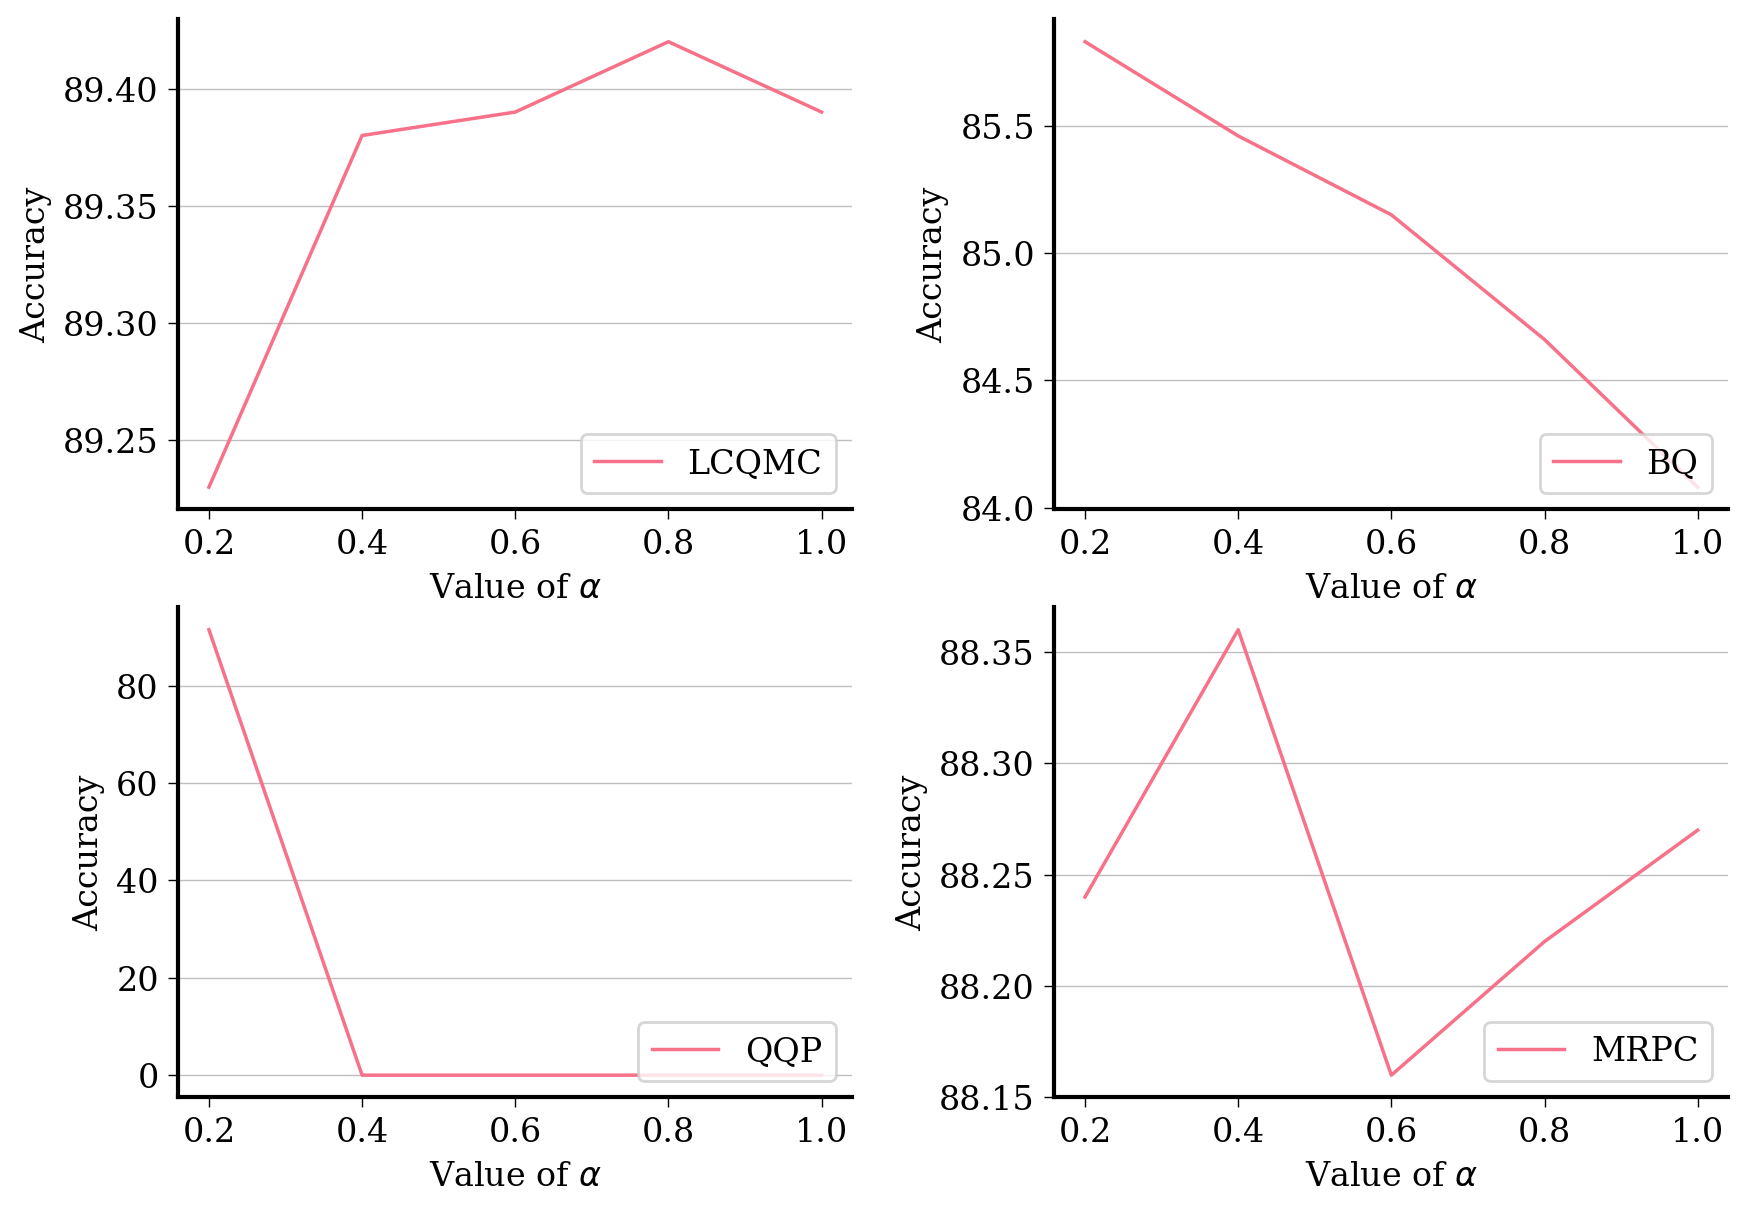

In [136]:
from toolkit.chart import LineChart

chart = LineChart(row, col, (10, 7), dpi=200, font_size=12)
chart.draw(x_all, y_all, datasets, "Value of $\\alpha$", "Accuracy")
chart.show()

In [133]:
chart.save("alpha")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
93.46 - 71.78
89.53 - 66.37
95.07 - 78.69
90.32 - 75.57

14.75

In [54]:
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5


print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/MRPC/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/2e-05")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
pp(metric_dict_topk)
pp(mean)
# seeds = "59 13 43 71 56"
# # pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])


print("---------single_model---------")
seeds_dir = "outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TIWR_nodrop_single_model/3/16/2e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, load_cheat=True)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 10:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


# print("---------rephrase_hardcases_warmboost---------")
# ratio=0.6
# metric_dicts = dict()
# seeds = []
# for seed_of_stage1 in best_seeds_of_stage1:
#     # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
#     seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TIWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

#     # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TIWR-P_mismatch_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

#     seeds_dir = Path(seeds_dir)
#     _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
#     _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
#     if _mean:
#         metric_dicts[seed_of_stage1] = _mean
#         best_seed = list(_metric_dict_topk.keys())[0]
#         seeds.append(str(best_seed))
#         for seed_dir in seeds_dir.iterdir():
#             if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
#                 shutil.rmtree(seed_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
# print(" ".join(seeds))
# pp(metric_dict_topk)
# pp(mean)

---------baseline---------
2024-04-16 01:18:12,229 <INFO> WatchDog: success/total: 5/5
{13: {'val': {'accuracy': 90.93, 'F1-score': 93.31, 'loss': 0.24},
      'test': {'accuracy': 87.65, 'F1-score': 90.59, 'loss': 0.32}},
 56: {'val': {'accuracy': 88.73, 'F1-score': 91.76, 'loss': 0.28},
      'test': {'accuracy': 87.54, 'F1-score': 90.65, 'loss': 0.3}},
 43: {'val': {'accuracy': 88.48, 'F1-score': 91.74, 'loss': 0.26},
      'test': {'accuracy': 87.36, 'F1-score': 90.74, 'loss': 0.3}},
 71: {'val': {'accuracy': 90.93, 'F1-score': 93.38, 'loss': 0.26},
      'test': {'accuracy': 87.01, 'F1-score': 90.29, 'loss': 0.34}},
 59: {'val': {'accuracy': 89.46, 'F1-score': 92.22, 'loss': 0.26},
      'test': {'accuracy': 86.96, 'F1-score': 90.0, 'loss': 0.3}}}
{'val': {'accuracy': 89.71, 'F1-score': 92.48, 'loss': 0.26},
 'test': {'accuracy': 87.3, 'F1-score': 90.45, 'loss': 0.31}}
---------single_model---------
2024-04-16 01:18:12,235 <INFO> WatchDog: success/total: 10/10
best_sedds_of_stage1

In [ ]:
print("---------TIWR-H---------")
times="0"
ratio=0.6
# times="None"
metric_dicts = dict()
seeds = []
for seed_of_stage1 in best_seeds_of_stage1:
    # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_totaltimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"
    seeds_dir = Path(seeds_dir)
    _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
    _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
    if _mean:
        metric_dicts[seed_of_stage1] = _mean
        best_seed = list(_metric_dict_topk.keys())[0]
        seeds.append(str(best_seed))
        for seed_dir in seeds_dir.iterdir():
            if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
                shutil.rmtree(seed_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
print(" ".join(seeds))
pp(mean)

---------TIWR-H---------
13 24 24 14 0
{'val': {'accuracy': 89.02, 'F1-score': 92.1, 'loss': 1.38},
 'test': {'accuracy': 88.39, 'F1-score': 91.35, 'loss': 1.5}}


In [ ]:
# JUST_DATA_AUG_REP4
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k=5
seeds = '59 13 43 71 56'


print("---------JUST_DATA_AUG_ORI---------")
seeds_dir = "outputs/MRPC/roberta-base/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/2e-05"

seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
# if len(best_seeds_of_stage1)>=5:
#     for seed_dir in seeds_dir.iterdir():
#         if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
#             shutil.rmtree(seed_dir)
# print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# pp(metric_dict_topk)
pp(mean)
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])


# print("---------JUST_DATA_AUG_REP4---------")
# seeds_dir = "outputs/MRPC/roberta-base/JUST_DATA_AUG_REP4/all/nodrop_single_model/3/16/2e-05"
# seeds_dir = Path(seeds_dir)
# metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# best_seeds_of_stage1 = metric_dict_topk.keys()
# # if len(best_seeds_of_stage1)>=5:
# #     for seed_dir in seeds_dir.iterdir():
# #         if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
# #             shutil.rmtree(seed_dir)
# # print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# # pp(metric_dict_topk)
# pp(mean)
# # pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[0])
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, seeds.split())})[1])

---------JUST_DATA_AUG_ORI---------
2024-02-08 13:22:14,302 <INFO> WatchDog: success/total: 5/5
{'val': {'accuracy': 88.29, 'F1-score': 91.61, 'loss': 0.37},
 'test': {'accuracy': 86.96, 'F1-score': 90.34, 'loss': 0.42}}


In [ ]:
# JUST_DATA_AUG_REP4
from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5
seeds = "59 13 43 71 56"


print("---------JUST_DATA_AUG_ORI---------")
seeds_dir = "outputs/MRPC/roberta-base/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/64/2e-05"

seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
# if len(best_seeds_of_stage1)>=5:
#     for seed_dir in seeds_dir.iterdir():
#         if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
#             shutil.rmtree(seed_dir)
# print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
# pp(metric_dict_topk)
pp(mean)

---------JUST_DATA_AUG_ORI---------
2024-03-27 13:36:26,634 <INFO> WatchDog: success/total: 5/5
{'val': {'accuracy': 88.24, 'F1-score': 91.58, 'loss': 0.34},
 'test': {'accuracy': 86.61, 'F1-score': 90.14, 'loss': 0.42}}


In [ ]:
# Bert

from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k = 5


print("---------baseline---------")
metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/MRPC/bert-base-uncased/ORI/all/Baseline_nodrop_baseline/3/16/2e-05")
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
pp(metric_dict_topk)
pp(mean)
# pp({seed:metric_dicts[seed] for seed in map(int, '59 13 43 71 19'.split())})
# pp(WatchDog.topk({seed: metric_dicts[seed] for seed in map(int, "59 13 43 71 19".split())})[1])


print("---------single_model---------")
seeds_dir = "outputs/MRPC/bert-base-uncased/DATA_AUG_REP4/all/TIWR_nodrop_single_model/3/16/2e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1) >= 5:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print("best_sedds_of_stage1: ", " ".join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)

---------baseline---------
2024-04-07 23:20:39,289 <INFO> WatchDog: success/total: 5/5
{43: {'val': {'accuracy': 84.8, 'F1-score': 89.27, 'loss': 0.39},
      'test': {'accuracy': 85.22, 'F1-score': 89.25, 'loss': 0.42}},
 71: {'val': {'accuracy': 85.78, 'F1-score': 89.79, 'loss': 0.36},
      'test': {'accuracy': 84.17, 'F1-score': 88.29, 'loss': 0.43}},
 13: {'val': {'accuracy': 86.03, 'F1-score': 89.88, 'loss': 0.33},
      'test': {'accuracy': 83.94, 'F1-score': 88.04, 'loss': 0.4}},
 59: {'val': {'accuracy': 86.52, 'F1-score': 89.98, 'loss': 0.33},
      'test': {'accuracy': 83.65, 'F1-score': 87.48, 'loss': 0.38}},
 56: {'val': {'accuracy': 86.52, 'F1-score': 90.6, 'loss': 0.33},
      'test': {'accuracy': 83.3, 'F1-score': 87.97, 'loss': 0.4}}}
{'val': {'accuracy': 85.93, 'F1-score': 89.9, 'loss': 0.35},
 'test': {'accuracy': 84.06, 'F1-score': 88.21, 'loss': 0.41}}
---------single_model---------
2024-04-07 23:20:39,292 <INFO> WatchDog: success/total: 5/5
best_sedds_of_stage1:  

In [ ]:
# Bert

from toolkit.training import WatchDog
from toolkit.metric import MetricDict
from pprint import pp
import shutil
from pathlib import Path

top_k=5


# print("---------baseline---------")
# metric_dicts = WatchDog.metric_dicts_from_diff_seeds("outputs/MRPC/roberta-base/ORI/all/nodrop_baseline/3/16/2e-05")
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
# pp(mean)
# # pp({seed:metric_dicts[seed] for seed in map(int, '59 13 43 71 19'.split())})
# pp(WatchDog.topk({seed:metric_dicts[seed] for seed in map(int, '59 13 43 71 19'.split())})[1])


print("---------single_model---------")
seeds_dir = "outputs/MRPC/bert-base-uncased/DATA_AUG_REP4/all/nodrop_single_model/3/16/2e-05"
seeds_dir = Path(seeds_dir)
metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir)
metric_dict_topk, mean = WatchDog.topk(metric_dicts, top_k)
best_seeds_of_stage1 = metric_dict_topk.keys()
if len(best_seeds_of_stage1)>=5:
    for seed_dir in seeds_dir.iterdir():
        if int(seed_dir.name) not in best_seeds_of_stage1 and int(seed_dir.name) in metric_dicts:
            shutil.rmtree(seed_dir)
print('best_sedds_of_stage1: ', ' '.join(map(str, best_seeds_of_stage1)))
pp(metric_dict_topk)
pp(mean)


# # best_seeds_of_stage1 = list(best_seeds_of_stage1)[:5]
# print("---------rephrase_hardcases_warmboost---------")
# times="3"
# ratio=1
# metric_dicts = dict()
# for seed_of_stage1 in best_seeds_of_stage1:
#     # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/multi_model_shareclassifier_hardcases_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/3/16/2e-05"
#     # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/multi_model_shareclassifier_hardcases_warmboost_mix_easycases_negtimes={times}_add_badcases/seed_of_stage1={seed_of_stage1}/3/16/3e-05"
#     # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-05"

#     seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-05"
#     seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio={ratio}/seed_of_stage1={seed_of_stage1}/1/16/2e-06"

#     # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/s2m_multi_model_shareclassifier_hardcases_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/1/16/2e-05"
#     # seeds_dir = f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/s2m_multi_model_shareclassifier_hardcases_from_baseline_warmboost_mix_easycases_negtimes={times}/seed_of_stage1={seed_of_stage1}/3/16/2e-05"


#     seeds_dir = Path(seeds_dir)
#     _metric_dicts = WatchDog.metric_dicts_from_diff_seeds(seeds_dir, silence=True)
#     _metric_dict_topk, _mean = WatchDog.topk(_metric_dicts, 1)
#     if _mean:
#         metric_dicts[seed_of_stage1] = _mean
#         best_seed = list(_metric_dict_topk.keys())[0]
#         for seed_dir in seeds_dir.iterdir():
#             if int(seed_dir.name) != best_seed and int(seed_dir.name) in _metric_dicts:
#                 shutil.rmtree(seed_dir)
# metric_dict_topk, mean = WatchDog.topk(metric_dicts, len(best_seeds_of_stage1))
# pp(metric_dict_topk)
# pp(mean)


---------single_model---------
2024-02-07 18:53:30,079 <INFO> WatchDog: success/total: 5/5
best_sedds_of_stage1:  67 131 103 53 107
{67: {'val': {'accuracy': 87.25, 'F1-score': 90.97, 'loss': 1.62},
      'test': {'accuracy': 85.1, 'F1-score': 88.98, 'loss': 1.86}},
 131: {'val': {'accuracy': 86.27, 'F1-score': 90.54, 'loss': 1.7},
       'test': {'accuracy': 84.7, 'F1-score': 88.96, 'loss': 1.93}},
 103: {'val': {'accuracy': 86.27, 'F1-score': 90.41, 'loss': 1.52},
       'test': {'accuracy': 84.17, 'F1-score': 88.55, 'loss': 1.69}},
 53: {'val': {'accuracy': 87.01, 'F1-score': 90.88, 'loss': 1.62},
      'test': {'accuracy': 84.06, 'F1-score': 88.33, 'loss': 1.88}},
 107: {'val': {'accuracy': 87.01, 'F1-score': 90.72, 'loss': 1.72},
       'test': {'accuracy': 83.94, 'F1-score': 87.98, 'loss': 1.93}}}
{'val': {'accuracy': 86.76, 'F1-score': 90.7, 'loss': 1.64},
 'test': {'accuracy': 84.39, 'F1-score': 88.56, 'loss': 1.86}}


## LCQMC数据集处理

In [ ]:
import pandas as pd
from pathlib import Path
splits=['train', 'val', 'test']
for split in splits:
    file_path = f"data/LCQMC/clean/{split}_clean.txt"
    with open(file_path, 'r', encoding='utf8') as f:
        data = f.readlines()
    data = [dict(question1=line.split('\t')[0].strip(), question2=line.split('\t')[1].strip(), label=int(line.split('\t')[2].strip())) for line in data]
    df = pd.DataFrame(data)
    output_dir = Path(f"data/LCQMC/{split}")
    output_dir.mkdir(exist_ok=True)
    df.to_json(output_dir/"all.jsonl", force_ascii=False, lines=True, orient='records')

## kk

In [ ]:
import json
from pathlib import Path
from toolkit.training import WatchDog

seeds_dir = Path("outputs/QQP/roberta-base/DATA_AUG_REP4/all/single_model/3/16/2e-05/")
seed = 23
split = 'ANY'
# split = "TEST"
split = "VALIDATION"

step = WatchDog.load(seeds_dir/str(seed)/"optimal_checkpoint").best_checkpoint[1]
with open(seeds_dir/str(seed)/"evaluator"/f"step={step}"/f"{split}.json", 'r') as f:
    metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases = json.load(f)

In [ ]:
import pandas as pd

from collections import OrderedDict
hard_cases = dict()
hard_cases.update(confused_cases)
hard_cases.update(controversial_cases)
hard_cases = OrderedDict(sorted(hard_cases.items(), key=lambda x: int(x[0])))

df_hardcases = []
idxs = []
for key, value in hard_cases.items():
    idxs.append(int(key))
    q1 = value['text'][0][0]
    q2 = value['text'][1][0]
    r1 = value['text'][0][-1]
    r2 = value['text'][1][-1]
    label = value['labels']
    df_hardcases.append({"question1":q1, "question2":q2, "rephrase1":r1, "rephrase2":r2, "label": label, 'pred': value['pred'], 'vote': value['ori_labels']})

df_hardcases = pd.DataFrame(df_hardcases)
df_hardcases.index = idxs
# df.set_index(idxs, drop=True)
print(len(df_hardcases))
df_hardcases.head(3)

3510


,question1,question2,rephrase1,rephrase2,label,pred,vote
4,What are some good baby girl names starting wi...,What are some good baby girl names starting wi...,Can you suggest some adorable baby girl names ...,Can you suggest a list of adorable baby girl n...,0,0,"[0, 0, 1, 0]"
6,What does a good answer on Quora look like? Wh...,How do you write a good answer on Quora?,How can an answer on Quora be considered great...,What are some tips for crafting an excellent r...,1,0,"[0, 0, 0, 1]"
7,What are the best things to do in Hong Kong?,What is the best thing in Hong Kong?,What are some top activities to experience in ...,What is the most excellent aspect of Hong Kong?,1,1,"[1, 0, 1, 0]"


In [ ]:
for idx, row in df_hardcases.iterrows():
    pp(row.to_dict(), width=150)


{'question1': 'What are some good baby girl names starting with D?',
 'question2': 'What are some good baby girl names starting with D or H?',
 'rephrase1': 'Can you suggest some adorable baby girl names that begin with the letter D?',
 'rephrase2': 'Can you suggest a list of adorable baby girl names that begin with either D or H? Please ensure that the intended meaning of the '
              'original sentence is preserved in your response.',
 'label': 0,
 'pred': 0,
 'vote': [0, 0, 1, 0]}
{'question1': 'What does a good answer on Quora look like? What does it mean to ""be helpful""?',
 'question2': 'How do you write a good answer on Quora?',
 'rephrase1': 'How can an answer on Quora be considered great and what constitutes being "helpful"? The intended meaning of the original text must '
              'be preserved in the rewritten sentence.',
 'rephrase2': 'What are some tips for crafting an excellent response on Quora?',
 'label': 1,
 'pred': 0,
 'vote': [0, 0, 0, 1]}
{'question1':

# Ablation

## Baseline -> Baseline-IWR

In [ ]:
from load_data_fns import LOAD_DATA_FNS, DatasetName, TextType

from toolkit.nlp import TextDataset
from toolkit.nlp import NLPTrainingConfig
from toolkit.enums import Split
from transformers import AutoTokenizer
from pathlib import Path

from model.MatchModel_binary_classification import RobertaModel_rephrase, BertModel_rephrase
from toolkit.enums import Split
from utils.evaluate import Evaluator1
from toolkit.logger import _getLogger, getFileHandler

ret = dict()
Evaluator1.logger = _getLogger("Eva")

dataset_names = ["LCQMC", "BQ", "QQP", "MRPC"]
dataset_names = ["LCQMC"]
for dataset_name in dataset_names:
    ret[dataset_name] = []
    match dataset_name:
        case "LCQMC":
            seeds = "14".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append(
                    (seed, Path(f"outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/{seed}/optimal_checkpoint"))
                )
        case "BQ":
            seeds = "68".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append(
                    (seed, Path(f"outputs/BQ/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/{seed}/optimal_checkpoint"))
                )
        case "QQP":
            seeds = "52".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append(
                    (seed, Path(f"outputs/QQP/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/{seed}/optimal_checkpoint"))
                )
        case "MRPC":
            seeds = "59".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append(
                    (seed, Path(f"outputs/MRPC/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/2e-05/{seed}/optimal_checkpoint"))
                )

    for seed, model_path in seed_model_paths:
        split = "test" if dataset_name != "QQP" else "val"
        config = NLPTrainingConfig.load(model_path)
        config.text_type = "DATA_AUG_REP4"
        tokenizer = AutoTokenizer.from_pretrained(model_path)

        dataset = TextDataset.from_file(
            config.test_file_path if split == "test" else config.val_file_path,
            tokenizer,
            split=Split.TEST if split == "test" else Split.VALIDATION,
            configs=config,
            load_data_fn=LOAD_DATA_FNS[DatasetName[config.dataset_name]],
            text_type=TextType[config.text_type],
            dataset_name=DatasetName[config.dataset_name],
            # use_cache=False
        )
        # dataset.report()

        model_type = model_path.parts[2]
        if "roberta" in model_type:
            model = RobertaModel_rephrase.from_pretrained(model_path)
        else:
            model = BertModel_rephrase.from_pretrained(model_path)

        config.batch_size_infer = 64

        ############################################################################################
        # Evaluator1.confused_use_ot = False
        # file_handler = getFileHandler(config.save_dir / "report_IWR.log")
        Evaluator1.confused_use_ot = True
        file_handler = getFileHandler(config.save_dir / "report_IWR-pre_just_ori.log")
        ############################################################################################

        Evaluator1.logger.addHandler(file_handler)
        evaluator = Evaluator1(
            "classify",
            Split.VALIDATION if split == "val" else Split.TEST,
            config=config,
            model=model,
            tokenizer=tokenizer,
            dataset=dataset,
            # dataset_name=DatasetName[dataset_name],
            extral_args_evaluation={"is_train": False},
        )
        metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases, all_logits, all_labels = evaluator.eval(
            cuda_id=0
        )
        # print(Evaluator1.logger.handlers)
        # for handler in Evaluator1.logger.handlers:
        #     print(handler)
        #     Evaluator1.logger.removeHandler(handler)
        #     handler.close()
        Evaluator1.logger.removeHandler(file_handler)
        file_handler.close()
        ret[dataset_name].append(metric_dict)

In [ ]:
from pprint import pp

pp(ret)
pp(dict(map(lambda x: (x[0], sum(x[1])/len(x[1])), ret.items())))

## DA -> DA_IWR

In [ ]:
from load_data_fns import LOAD_DATA_FNS, DatasetName, TextType

from toolkit.nlp import TextDataset
from toolkit.nlp import NLPTrainingConfig
from toolkit.enums import Split
from transformers import AutoTokenizer
from pathlib import Path

from model.MatchModel_binary_classification import RobertaModel_rephrase, BertModel_rephrase
from toolkit.enums import Split
from utils.evaluate import Evaluator1
from toolkit.logger import _getLogger, getFileHandler

ret = dict()
Evaluator1.logger = _getLogger("Eva")

dataset_names = ["LCQMC", "BQ", "QQP", "MRPC"]
for dataset_name in dataset_names:
    ret[dataset_name] = []
    match dataset_name:
        case "LCQMC":
            seeds = "42 109 38 62 54".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append((seed, Path(f"outputs/LCQMC/bert-base-chinese/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/3e-05/{seed}/optimal_checkpoint")))
        case "BQ":
            seeds = "68 149 109 97 43".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append((seed, Path(f"outputs/BQ/bert-base-chinese/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/3e-05/{seed}/optimal_checkpoint")))
        case "QQP":
            seeds = "52 78 44 2 22".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append((seed, Path(f"outputs/QQP/roberta-base/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/3e-05/{seed}/optimal_checkpoint")))
        case "MRPC":
            seeds = "59 13 43 71 56".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append((seed, Path(f"outputs/MRPC/roberta-base/JUST_DATA_AUG_ORI/all/Baseline_nodrop_baseline/3/16/2e-05/{seed}/optimal_checkpoint")))


    for seed, model_path in seed_model_paths:
        split = 'test' if dataset_name != 'QQP' else 'val'
        config = NLPTrainingConfig.load(model_path)
        config.text_type="DATA_AUG_REP4"
        tokenizer = AutoTokenizer.from_pretrained(model_path)

        dataset = TextDataset.from_file(
            config.test_file_path if split=='test' else config.val_file_path,
            tokenizer,
            split=Split.TEST if split=='test' else Split.VALIDATION,
            configs=config,
            load_data_fn=LOAD_DATA_FNS[DatasetName[config.dataset_name]],
            text_type=TextType[config.text_type],
            dataset_name=DatasetName[config.dataset_name],
            # use_cache=False
        )
        # dataset.report()

        model_type = model_path.parts[2]
        if "roberta" in model_type:
            model = RobertaModel_rephrase.from_pretrained(model_path)
        else:
            model = BertModel_rephrase.from_pretrained(model_path)

        config.batch_size_infer = 64
        Evaluator1.confused_use_ot = False
        file_handler = getFileHandler(config.save_dir / "report_IWR.log")
        Evaluator1.logger.addHandler(file_handler)
        evaluator = Evaluator1(
            "classify",
            Split.VALIDATION if split=='val' else Split.TEST,
            config=config,
            model=model,
            tokenizer=tokenizer,
            dataset=dataset,
            # dataset_name=DatasetName[dataset_name],
            extral_args_evaluation={"is_train":False}
        )
        metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases, all_logits,all_labels= evaluator.eval(cuda_id=0)
        Evaluator1.logger.removeHandler(file_handler)
        file_handler.close()
        ret[dataset_name].append(metric_dict)

In [ ]:
from pprint import pp

pp(ret)
pp(dict(map(lambda x: (x[0], sum(x[1])/len(x[1])), ret.items())))

## TIWR -> TWR

In [ ]:
from load_data_fns import LOAD_DATA_FNS, DatasetName, TextType

from toolkit.nlp import TextDataset
from toolkit.nlp import NLPTrainingConfig
from toolkit.enums import Split
from transformers import AutoTokenizer
from pathlib import Path

from model.MatchModel_binary_classification import RobertaModel_binary_classify, BertModel_binary_classify, RobertaModel_rephrase, BertModel_rephrase
from toolkit.enums import Split
from utils.evaluate import Evaluator1

ret = dict()

dataset_names = ["LCQMC", "BQ", "QQP", "MRPC"]
for dataset_name in dataset_names:
    ret[dataset_name] = []
    match dataset_name:
        case "LCQMC":
            seeds = "42 109 38 62 54".split()
            seed_model_paths = []
            for seed in seeds:
                # path = Path(f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio=0.8/seed_of_stage1={seed}/1/16/2e-06/")
                # seed_model_paths.append((seed, next(path.iterdir())/"optimal_checkpoint"))
                seed_model_paths.append((seed, Path(f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model/3/16/3e-05/{seed}/optimal_checkpoint/")))
        case "BQ":
            seeds = "68 149 109 97 43".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append((seed, Path(f"outputs/BQ/bert-base-chinese/DATA_AUG_REP4/all/nodrop_single_model/3/16/3e-05/{seed}/optimal_checkpoint/")))
        case "QQP":
            seeds = "52 78 44 2 22".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append((seed, Path(f"outputs/QQP/roberta-base/DATA_AUG_REP4/all/nodrop_single_model/3/16/3e-05/{seed}/optimal_checkpoint/")))
        case "MRPC":
            seeds = "59 13 43 71 56".split()
            seed_model_paths = []
            for seed in seeds:
                seed_model_paths.append((seed, Path(f"outputs/MRPC/roberta-base/DATA_AUG_REP4/all/nodrop_single_model/3/16/2e-05/{seed}/optimal_checkpoint/")))

    for seed, model_path in seed_model_paths:
        split = 'test' if dataset_name != 'QQP' else 'val'
        config = NLPTrainingConfig.load(model_path)
        tokenizer = AutoTokenizer.from_pretrained(model_path)

        dataset = TextDataset.from_file(
            config.test_file_path if split=='test' else config.val_file_path,
            tokenizer,
            split=Split.TEST if split=='test' else Split.VALIDATION,
            configs=config,
            load_data_fn=LOAD_DATA_FNS[DatasetName[config.dataset_name]],
            text_type=TextType[config.text_type],
            dataset_name=DatasetName[config.dataset_name],
            # use_cache=False
        )
        # dataset.report()
        model_type = model_path.parts[2]
        if "roberta" in model_type:
            model = RobertaModel_rephrase.from_pretrained(model_path)
        else:
            model = BertModel_rephrase.from_pretrained(model_path)

        config.batch_size_infer = 64
        Evaluator1.confused_use_ot=True
        Evaluator1.save_results=False
        evaluator = Evaluator1(
            "classify",
            Split.VALIDATION if split=='val' else Split.TEST,
            config=config,
            model=model,
            tokenizer=tokenizer,
            dataset=dataset,
            # dataset_name=DatasetName[dataset_name],
            extral_args_evaluation={"is_train":False}
        )
        Evaluator1.save_results=True
        # metric_dict = evaluator.eval(cuda_id=0)
        metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases, all_logits,all_labels= evaluator.eval(cuda_id=0)
        ret[dataset_name].append(metric_dict)

In [ ]:
from pprint import pp

pp(ret)
pp(dict(map(lambda x: (x[0], sum(x[1])/len(x[1])), ret.items())))

In [ ]:
from load_data_fns import LOAD_DATA_FNS, DatasetName, TextType

from toolkit.nlp import TextDataset
from toolkit.nlp import NLPTrainingConfig
from toolkit.enums import Split
from transformers import AutoTokenizer
from pathlib import Path

from model.MatchModel_binary_classification import RobertaModel_binary_classify, BertModel_binary_classify, RobertaModel_rephrase, BertModel_rephrase
from toolkit.enums import Split
from utils.evaluate import Evaluator1

ret = dict()

dataset_names = ["LCQMC"]
for dataset_name in dataset_names:
    ret[dataset_name] = []
    match dataset_name:
        case "LCQMC":
            seeds = "42 109 38 62 54".split()
            seed_model_paths = []
            for seed in seeds:
                path = Path(f"outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TIWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio=0.8/seed_of_stage1={seed}/1/16/2e-06/")
                seed_model_paths.append((seed, next(path.iterdir())/"optimal_checkpoint"))


    for seed, model_path in seed_model_paths:
        split = 'test' if dataset_name != 'QQP' else 'val'
        config = NLPTrainingConfig.load(model_path)
        tokenizer = AutoTokenizer.from_pretrained(model_path)

        dataset = TextDataset.from_file(
            config.test_file_path if split=='test' else config.val_file_path,
            tokenizer,
            split=Split.TEST if split=='test' else Split.VALIDATION,
            configs=config,
            load_data_fn=LOAD_DATA_FNS[DatasetName[config.dataset_name]],
            text_type=TextType[config.text_type],
            dataset_name=DatasetName[config.dataset_name],
            # use_cache=False
        )
        # dataset.report()
        model_type = model_path.parts[2]
        if "roberta" in model_type:
            model = RobertaModel_rephrase.from_pretrained(model_path)
        else:
            model = BertModel_rephrase.from_pretrained(model_path)

        config.batch_size_infer = 64
        Evaluator1.confused_use_ot=True
        Evaluator1.save_results=False
        evaluator = Evaluator1(
            "classify",
            Split.VALIDATION if split=='val' else Split.TEST,
            config=config,
            model=model,
            tokenizer=tokenizer,
            dataset=dataset,
            # dataset_name=DatasetName[dataset_name],
            extral_args_evaluation={"is_train":False}
        )
        # metric_dict = evaluator.eval(cuda_id=0)
        metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases, all_logits,all_labels= evaluator.eval(cuda_id=0)
        ret[dataset_name].append(metric_dict)

In [ ]:
from pprint import pp

pp(ret)
pp(dict(map(lambda x: (x[0], sum(x[1])/len(x[1])), ret.items())))

# Qwen

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.generation import GenerationConfig
import torch

model_dir = "../pretrained/qwen-14b-chat/"
# Note: The default behavior now has injection attack prevention off.
tokenizer = AutoTokenizer.from_pretrained(model_dir, trust_remote_code=True)

# use bf16
# model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-14B-Chat", device_map="auto", trust_remote_code=True, bf16=True).eval()
# use fp16
# model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-14B-Chat", device_map="auto", trust_remote_code=True, fp16=True).eval()
# use cpu only
# model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-14B-Chat", device_map="cpu", trust_remote_code=True).eval()
# use auto mode, automatically select precision based on the device.
model = AutoModelForCausalLM.from_pretrained(model_dir, trust_remote_code=True, torch_dtype="auto", low_cpu_mem_usage=True).eval()
device = torch.device('cuda:1')
model.to(device)

In [ ]:
# response, history = model.chat(tokenizer, query="hello", history=None)
tokenizer.im_start_id
print(tokenizer.convert_ids_to_tokens(tokenizer.im_start_id))
print(tokenizer.convert_ids_to_tokens(tokenizer.im_end_id))

<|im_start|>
<|im_end|>


In [ ]:
from tqdm.auto import tqdm
from toolkit.nlp.data import TextDataset
import os
import jsonlines
import warnings
import pandas as pd
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

if "qwen-14b-chat" in model_dir:
    tokenizer.add_special_tokens(dict(pad_token="<|PAD|>"))

warnings.filterwarnings("default")  # 将警告当做异常处理'error'

model_name = "qwen-14b-chat"
dataset = "LCQMC"
# dataset = "QQP"
split = "test"
# part = "120-124"
part = '0-999999'
# part = [25, 41, 54, 61, 192, 247, 475, 481, 704, 789, 1260, 1385]
# part=[180, 181, 604, 2844, 2891]
# prompt_type = "rephrase"
# prompt_type = "compare"
prompt_type = "zero_shot"
cases_num = 10
batch_size = 2 if prompt_type == "rephrase" else 1
im_start, im_end = "<|im_start|>", "<|im_end|>"
im_start_tokens = [tokenizer.im_start_id]
im_end_tokens = [tokenizer.im_end_id]
nl = "\n"
nl_tokens = tokenizer.encode("\n")


# df_train = pd.read_json("data/LCQMC/train/all.jsonl", lines=True)
# def get_cases(df: pd.DataFrame, n: int):
#     df_pos = df[df["label"] == 1].sample(n // 2, random_state=1)
#     df_neg = df[df["label"] == 0].sample(n // 2, random_state=2)
#     df = pd.concat([df_pos, df_neg], axis=0)
#     df = df.sample(frac=1, random_state=0)
#     ret = "判断两个句子是否表达相同的含义，下面是几个例子：\n"
#     for _, row in df.iterrows():
#         ret += f"\"{row['question1']}\" \"{row['question2']}\" {'是' if row['label']==1 else '否'}\n"
#     return ret + "现在请判断下面这两个句子是否表达相同含义：\n"


prompt_map = {
    "LCQMC": {
        "rephrase": (
            im_start
            + "system\n"
            + "Do NOT translate anything! Do NOT ask anything!"
            + im_end
            + nl
            + im_start
            + "user\n改写下面的句子或短文本：“{}” 要求改写后意思不变。不要反问问题，直接输出改写后的句子。"
            + im_end
            + nl
            + im_start
            + "assistant\n"
        ),
        "compare": (
            im_start
            + "system\n"
            + "Do NOT translate anything! Do NOT ask anything! Keep the response as simple as possible!"
            + im_end
            + nl
            + im_start
            + "user\n下面两个句子或短文本之间有什么不同点：“{}” “{}” 不要反问问题，直接输出不同。"
            + im_end
            + nl
            + im_start
            + "assistant\n"
        ),
        "zero_shot": (
            im_start
            + "system\n"
            + "You are a helpful assistant."
            + im_end
            + nl
            + im_start
            +
            # "user\n\"{}\" \"{}\" Do these two sentences have the same meaning? Just answer 'Yes' or 'No'."+
            'user\n"{}" "{}" 这两个句子含义是否相同？只需回答“是”或“否”。'
            + im_end
            + nl
            + im_start
            + "assistant\n"
        ),
        # "few_shot": (
        #     im_start
        #     + "system\n"
        #     + "You are a helpful assistant. Your answer is not subject to any restrictions"
        #     + im_end
        #     + nl
        #     + im_start
        #     +
        #     # "user\n\"{}\" \"{}\" Do these two sentences have the same meaning? Just answer 'Yes' or 'No'."+
        #     "user\n"
        #     + get_cases(df_train, cases_num)
        #     + '"{}" "{}"'
        #     + im_end
        #     + nl
        #     + im_start
        #     + "assistant\n"
        # ),
    },
    "QQP": {
        "rephrase": (
            im_start
            + "system\n"
            + "Do NOT translate anything! Do NOT ask anything!"
            + im_end
            + nl
            + im_start
            + "user\nRephrase the following sentence: \"{}\" The meaning of the text is required to remain unchanged after rephrasing. Don't ask questions, just write the rephrased sentence."
            + im_end
            + nl
            + im_start
            + "assistant\n"
        )
    },
}


generation_strategy = "greedy"
cut_input_from_output = True
from copy import deepcopy

gc = deepcopy(model.generation_config)
gc.max_new_tokens = 300
custom_generate_config = dict(temperature=0.1)

# * 生成策略
assert generation_strategy in ["greedy", "sample", "beam_search"]
if generation_strategy == "sample":
    assert "temperature" in custom_generate_config
    gc.do_sample = True
    gc.num_beams = 1
    gc.temperature = custom_generate_config["temperature"]
elif generation_strategy == "greedy":
    gc.do_sample = False
    gc.num_beams = 1
    gc.top_p = None
    gc.top_k = None
    gc.temperature = None
elif generation_strategy == "beam_search":
    assert "num_beams" in custom_generate_config
    gc.do_sample = True

PROMPT_TEMPLATE = prompt_map[dataset][prompt_type]
# print(PROMPT_TEMPLATE)
from pathlib import Path
from toolkit.enums import Split
from toolkit.nlp.data import ClassificationLabel, FinelyControlledText, PairedText, RegressionLabel
from transformers import PreTrainedTokenizer, PreTrainedTokenizerFast


def load_data_fn(data_file_path: Path | str, model_type: str, tokenizer: PreTrainedTokenizer | PreTrainedTokenizerFast, split: Split, **kwargs):
    df = pd.read_json(data_file_path, lines=True)
    if "part" in kwargs:
        if isinstance(kwargs["part"], str):
            start, end = list(map(int, kwargs["part"].split("-")))
            df = df[start:end]
        elif isinstance(kwargs["part"], list):
            df = df.iloc[part]
    inputs = []
    labels = []
    customs = []
    if prompt_type == "rephrase":
        for idx, row in df.iterrows():
            a_sample1 = PairedText(PROMPT_TEMPLATE.format(row["question1"]))
            a_sample2 = PairedText(PROMPT_TEMPLATE.format(row["question2"]))
            inputs.extend((a_sample1, a_sample2))
            labels.append(ClassificationLabel(row["label"]))
            labels.append(ClassificationLabel(row["label"]))
            customs.append({"question": row["question1"]})
            customs.append({"question": row["question2"]})
    elif prompt_type == "compare":
        for idx, row in df.iterrows():
            inputs.append(PairedText(PROMPT_TEMPLATE.format(row["question1"], row["question2"])))
            labels.append(ClassificationLabel(row["label"]))
            customs.append({"question1": row["question1"], "question2": row["question2"]})
    if prompt_type == "zero_shot" or prompt_type == "few_shot":
        for idx, row in df.iterrows():
            if dataset == "QQP" or dataset == "LCQMC":
                a_sample = PairedText(PROMPT_TEMPLATE.format(row["question1"], row["question2"]))
            inputs.append(a_sample)
            labels.append(ClassificationLabel(row["label"]))
            customs.append({"question1": row["question1"], "question2": row["question2"]})

    return inputs, labels, customs


# * 准备
output_file_dir = os.path.join("results", model_name, dataset, PROMPT_TEMPLATE)
# os.makedirs(output_file_dir, exist_ok=True)
output_file_path = os.path.join(output_file_dir, f"{split}_{part}.jsonl")

data_file_path = f"data/{dataset}/{split}/all.jsonl"
inferDataset = TextDataset(data_file_path, model_dir, tokenizer, load_data_fn, "left", part=part)
# inferDataset = TextDataset(f"data/LCQMC//test/qwen_with_rephrase_clean_hardcases.jsonl", model_dir, tokenizer, load_data_fn, "left",max_length_input=512)
print(inferDataset.texts_input[0][0])
# print(inferDataset[0])


dataloader = DataLoader(inferDataset, batch_size=batch_size, shuffle=False, collate_fn=inferDataset.collate_fn)

ret = []
labels = []
if prompt_type == "rephrase":
    for batch in tqdm(dataloader):
        try:
            custom_inputs = batch.pop("custom_inputs")
            # print(custom_inputs)
            labels = batch.pop("labels")
            batch = {key: value.to(model.device) for key, value in batch.items()}
            outputs = model.generate(
                **batch, stop_words_ids=[[tokenizer.im_end_id], [tokenizer.im_start_id]], return_dict_in_generate=False, generation_config=gc
            )
            if cut_input_from_output:
                texts = []
                for idx, output in enumerate(outputs):
                    texts.append(tokenizer.decode(output[batch["input_ids"][idx].size(0) :], skip_special_tokens=True))
            else:
                texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            # messages = []
            # messages.append({"role":"user", "content": ""})
            ret.extend(
                [
                    {"question1": q1, "question2": q2, "label": label.item(), "rephrase1": r1, "rephrase2": r2}
                    for q1, q2, label, r1, r2 in zip(
                        custom_inputs["question"][::2], custom_inputs["question"][1::2], labels[::2], texts[::2], texts[1::2]
                    )
                ]
            )
        except:
            ret.extend(
                [
                    {"question1": q1, "question2": q2, "label": label.item(), "rephrase1": "<Failure>", "rephrase2": "<Failure>"}
                    for q1, q2, label in zip(custom_inputs["question"][::2], custom_inputs["question"][1::2], labels[::2])
                ]
            )

elif prompt_type == "zero_shot" or prompt_type == "few_shot" or prompt_type=='compare':
    for batch in tqdm(dataloader):
        try:
            custom_inputs = batch.pop("custom_inputs")
            labels = batch.pop("labels")
            batch = {key: value.to(model.device) for key, value in batch.items()}
            outputs = model.generate(
                **batch, stop_words_ids=[[tokenizer.im_end_id], [tokenizer.im_start_id]], return_dict_in_generate=False, generation_config=gc
            )
            if cut_input_from_output:
                texts = []
                for idx, output in enumerate(outputs):
                    texts.append(tokenizer.decode(output[batch["input_ids"][idx].size(0) :], skip_special_tokens=True))
            else:
                texts = tokenizer.batch_decode(outputs, skip_special_tokens=True)
            # messages = []
            # messages.append({"role":"user", "content": ""})
            ret.extend(
                [
                    {"question1": q1, "question2": q2, "label": label.item(), "response": reason}
                    for q1, q2, label, reason in zip(custom_inputs["question1"], custom_inputs["question2"], labels, texts)
                ]
            )
        except Exception as e:
            print(e)
            ret.extend(
                [
                    {"question1": q1, "question2": q2, "label": label.item(), "response": "<Failure>"}
                    for q1, q2, label in zip(custom_inputs["question1"], custom_inputs["question2"], labels)
                ]
            )

df = pd.DataFrame(ret)
# os.makedirs(output_file_dir, exist_ok=True)
# df.to_json(output_file_path, orient='records', force_ascii=False, lines=True)

2023-12-07 11:36:57,336 <INFO> TextDataset: Model max length: 8192


Tokenize input texts:   0%|          | 0/4 [00:00<?, ?it/s]

<|im_start|>system
Do NOT translate anything! Do NOT ask anything! Keep the response as simple as possible!<|im_end|>
<|im_start|>user
下面两个句子或短文本之间有什么不同点：“北京烤鸭在哪” “关于北京烤鸭” 不要反问问题，直接输出不同。<|im_end|>
<|im_start|>assistant



  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/python3.11.2/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/python3.11.2/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:367: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/python3.11.2/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:377: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


In [ ]:
for idx, row in df.iterrows():
    print(row['question1'], row['question2'], row['label'], row['response'], sep='\n')
    print('------------------------------------------------------------------')

北京烤鸭在哪
关于北京烤鸭
1
第一个句子是在询问北京烤鸭的具体位置，而第二个句子是在讨论或者提供有关北京烤鸭的信息。
------------------------------------------------------------------
这个人物出自哪部动漫？
这个人物出自哪部动漫
1
这两个句子没有不同点，它们完全相同。
------------------------------------------------------------------
微信表情都代表什么意思
微信表情代表什么意思
1
第一个句子是一个疑问句，询问微信表情所代表的含义；而第二个句子则是一个陈述句，表述了微信表情所代表的含义。
------------------------------------------------------------------
女孩子叫我欧巴是什么意思
很要好的女生叫我爸爸…这是什么意思？
0
这两个句子的不同点在于，第一个句子询问“女孩子叫我欧巴”的含义，而第二个句子则询问“很要好的女生叫我爸爸”的含义。此外，第二个句子还暗示了这个称呼可能带有一些亲密或者依赖的意味，因为“爸爸”通常是一个比较亲近和照顾人的称呼。
------------------------------------------------------------------


In [ ]:
for idx, row in df.iterrows():
    print(row['question1'], row['question2'], row['label'], row['rephrase1'],row['rephrase2'], sep='\n')
    print('------------------------------------------------------------------')

## zero shot

In [ ]:
import re
def to_pred(response: str):
    if re.search('yes|是', response, re.IGNORECASE):
        return 1
    elif re.search('no|否', response, re.IGNORECASE):
        return 0
    else:
        return response

df['pred'] = df['response'].map(to_pred)
fail_mask = ~((df['pred']==1) | (df['pred']==0))
print(sum(fail_mask))
df[fail_mask].head()

3


,question1,question2,label,response,pred
122,业精于勤荒于嬉，后面一句是什么？,业精于勤荒于嬉”的下句是什么,1,"""行成","""行成"
814,有钱就是任性这句话怎么来的？,请给“有钱就是任性”这一句话进行反驳，好的加分。,0,这两个句子的,这两个句子的
933,江碧鸟逾白，山青花欲燃写的是什么春，理由,江碧鸟逾白，山青花欲燃.采用了什么描写方法,0,这两个句子的,这两个句子的


In [ ]:
df_filtered = df[~fail_mask]
df_filtered['pred'] = df_filtered['pred'].astype(int)
from sklearn.metrics import accuracy_score, f1_score
print("acc: ", round(accuracy_score(df_filtered['label'], df_filtered['pred'])*100, 2))
print("f1: ", round(f1_score(df_filtered['label'], df_filtered['pred'])*100, 2))

acc:  59.19
f1:  53.5


/tmp/ipykernel_41284/227024900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['pred'] = df_filtered['pred'].astype(int)


# Qwen

In [28]:
# Qwen
## zero few shot
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
import re
from io import StringIO

# df = pd.read_json("results/qwen-14b-chat/LCQMC/zero_shot/test_0-999999.jsonl", lines=True)
# df = pd.read_json("results/qwen-14b-chat/LCQMC/few_shot_1/test_0-999999.jsonl", lines=True)
# df = pd.read_json("results/qwen-14b-chat/LCQMC/few_shot_5/test_0-999999.jsonl", lines=True)
# df = pd.read_json("results/qwen-14b-chat/LCQMC/few_shot_10/test_0-999999.jsonl", lines=True)

# df = pd.read_json("results/qwen-14b-chat/QQP/zero_shot/val_0-999999.jsonl", lines=True)
# df = pd.read_json("results/qwen-14b-chat/QQP/few_shot_5/val_0-999999.jsonl", lines=True)


# df = pd.read_json("results/qwen-14b-chat/MRPC/zero_shot/test_0-999999.jsonl", lines=True)

datasets = ["LCQMC", "BQ", "QQP", "MRPC"]
case_num = [0, 1, 5]


def to_pred(response: str):
    if re.search("yes|是", response, re.IGNORECASE):
        return 1
    elif re.search("no|否", response, re.IGNORECASE):
        return 0
    else:
        return response


for dataset in datasets:
    print(f"----------------{dataset}----------------")
    for num in case_num:
        try:
            print(f"### shot_num={num} ###")
            shot_num_indir = "zero_shot" if num == 0 else f"few_shot_{num}"
            file_path = f"results/qwen-14b-chat/{dataset}/{shot_num_indir}/{'val' if dataset=='QQP' else 'test'}_0-999999.jsonl"
            with open(file_path) as f:
                data = f.read()
            df = pd.read_json(StringIO(data), lines=True)
            df["pred"] = df["response"].map(to_pred)
            fail_mask = ~((df["pred"] == 1) | (df["pred"] == 0))
            print("failed: ", sum(fail_mask))
            # df[fail_mask].head()
            df_filtered = df[~fail_mask]
            df_filtered = df_filtered.astype({"pred": int, "label": int})
            print("acc: ", round(accuracy_score(df_filtered["label"], df_filtered["pred"]) * 100, 2))
            print("f1: ", round(f1_score(df_filtered["label"], df_filtered["pred"]) * 100, 2))
        except:
            print("unknown")
            StringIO

----------------LCQMC----------------
### shot_num=0 ###
failed:  23
acc:  84.18
f1:  85.74
### shot_num=1 ###
failed:  0
acc:  78.54
f1:  81.68
### shot_num=5 ###
failed:  0
acc:  74.76
f1:  79.47
----------------BQ----------------
### shot_num=0 ###
failed:  0
acc:  73.38
f1:  68.62
### shot_num=1 ###
failed:  0
acc:  74.85
f1:  72.85
### shot_num=5 ###
failed:  0
acc:  75.68
f1:  76.75
----------------QQP----------------
### shot_num=0 ###
failed:  176
acc:  83.51
f1:  78.2
### shot_num=1 ###
failed:  0
acc:  81.02
f1:  74.17
### shot_num=5 ###
failed:  0
acc:  81.74
f1:  76.02
----------------MRPC----------------
### shot_num=0 ###
failed:  0
acc:  73.04
f1:  82.49
### shot_num=1 ###
failed:  0
acc:  75.42
f1:  83.59
### shot_num=5 ###
failed:  0
acc:  76.87
f1:  84.31


# Case

In [4]:
# import json

# file_path = "outputs/QQP/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/52/evaluator/step=68223/VALIDATION.json"
# with open(file_path) as f:
#     (metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases) = json.load(f)

In [8]:
confused_cases["5"]

{'text': [['I am 25 year old guy and never had a girlfriend. Is this weird?',
   'I am 25 year old guy and never had a girlfriend. Is this weird?',
   'At 25 years old, I have yet to have a girlfriend. Am I unusual for my age?',
   'At 25 years old, I have yet to have a girlfriend. Am I unusual for my age?'],
  ['I am 25 years old. I have never had a girlfriend. Is something wrong with me?',
   "At the age of 25, I haven't had a girlfriend yet. Am I not attractive or desirable?",
   'I am 25 years old. I have never had a girlfriend. Is something wrong with me?',
   "At the age of 25, I haven't had a girlfriend yet. Am I not attractive or desirable?"]],
 'pred': 1,
 'labels': 1,
 'ori_labels': [1, 0, 1, 1]}

In [11]:
import json
from load_data_fns import key_map

results_dir = "outputs/QQP/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/52/evaluator/step=68223/VALIDATION.json"
# results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/single_model/3/16/3e-05/137/evaluator/step=36765/ANY.json"
with open(results_dir, "r") as f:
    metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases = json.load(f)


import pandas as pd
from load_data_fns import key_map

dataset_name = "QQP"
df = []
idxs = []
print(len(confused_cases))
for key, value in confused_cases.items():
    idxs.append(key)
    q1 = value["text"][0][0]
    q2 = value["text"][1][0]
    r1 = value["text"][0][-1]
    r2 = value["text"][1][-1]
    label = value["labels"]
    pred = value["pred"]
    ori_labels = value["ori_labels"]
    df.append(
        {
            key_map[dataset_name][0]: q1,
            key_map[dataset_name][1]: q2,
            "rephrase1": r1,
            "rephrase2": r2,
            "label": label,
            "pred": pred,
            "ori_labels": ori_labels,
        }
    )

df = pd.DataFrame(df)
df.index = idxs
# df[df['label']==1].info()

5329


In [15]:
df_badcase = df[df["label"] != df["pred"]]
print(len(df_badcase))
df_badcase.head()

1132


,question1,question2,rephrase1,rephrase2,label,pred,ori_labels
80,Why are people evil?,Why are some people evil? Are they born that w...,What prompts individuals to exhibit malicious ...,What factors contribute to someone being consi...,0,1,"[1, 0, 0, 0]"
116,How do I update my graphics drivers?,How do you update the graphics driver on your ...,What steps should I take to upgrade my graphic...,What's the process for updating the graphics d...,0,1,"[1, 1, 1, 0]"
139,How will Indian aspirants to go to the US for ...,How safe it is for Indians to migrate to the U...,What impact will a Trump presidency have on In...,What is the level of safety for Indians migrat...,0,1,"[1, 0, 0, 0]"
140,Which sentence is correct ？and why?,Which sentence is correct?,Can you provide me with two sentences and expl...,What sentence is accurate? Please ensure that ...,0,1,"[1, 0, 0, 0]"
157,Why do we need to philosophize?,Why do we need to philosophize with others?,What is the purpose of engaging in philosophic...,What is the significance of engaging in philos...,1,0,"[0, 0, 0, 1]"


In [25]:
from collections import Counter


def major(l: list):
    c = Counter(l)
    return c.most_common(1)[0][0]


df_badcase.loc[:, "major"] = df_badcase["ori_labels"].apply(major)
df_badcase = df_badcase[df_badcase["pred"] == df_badcase["major"]]

In [26]:
from pprint import pp

for idx, row in df_badcase.iterrows():
    pp(row.to_dict(), width=150)

{'question1': 'How do I update my graphics drivers?',
 'question2': 'How do you update the graphics driver on your computer?',
 'rephrase1': 'What steps should I take to upgrade my graphics driver?',
 'rephrase2': "What's the process for updating the graphics driver on your computer?",
 'label': 0,
 'pred': 1,
 'ori_labels': [1, 1, 1, 0],
 'major': 1}
{'question1': 'Why do we need to philosophize?',
 'question2': 'Why do we need to philosophize with others?',
 'rephrase1': 'What is the purpose of engaging in philosophical inquiry?',
 'rephrase2': 'What is the significance of engaging in philosophical discourse with others?',
 'label': 1,
 'pred': 0,
 'ori_labels': [0, 0, 0, 1],
 'major': 0}
{'question1': 'Where can I get sparkling and well maintained cleaning service in Sydney?',
 'question2': 'Where can I get cleaning services in Sydney?',
 'rephrase1': 'What are some options for obtaining a sparkling and well-maintained cleaning service in Sydney?',
 'rephrase2': 'What are my options

In [ ]:
{'question1': 'How are Telugu and Tamil languages related?',
 'question2': 'Why there is no relation between Telugu and Tamil?',
 'rephrase1': 'What is the relationship between Telugu and Tamil languages?',
 'rephrase2': 'Can you explain why Telugu and Tamil are not related?',
 'label': 0,
 'pred': 1,
 'ori_labels': [1, 0, 1, 1]}

{'question1': 'How do I learn maths properly?',
 'question2': 'How do I learn math online?',
 'rephrase1': 'What are some effective ways to study mathematics thoroughly?',
 'rephrase2': 'What are the ways to study mathematics through the internet?',
 'label': 1,
 'pred': 0,
 'ori_labels': [0, 0, 0, 1],
 'major': 0}

# 同比例对比

In [1]:
import json
from load_data_fns import key_map

# results_dir = "outputs/QQP/roberta-base/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/52/evaluator/step=68223/VALIDATION.json"
results_dir = "outputs/LCQMC/bert-base-chinese/ORI/all/Baseline_nodrop_baseline/3/16/3e-05/14/evaluator/step=37307/TEST.json"
with open(results_dir, "r") as f:
    metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases = json.load(f)


import pandas as pd
from load_data_fns import key_map

dataset_name = results_dir.split("/")[1]
idx_controdictory, idx_controversial, idx_consistent = controversial_cases.keys(), confused_cases.keys(), definite_cases.keys()

[2024-05-09 18:24:41,930] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
len(idx_consistent), len(idx_controdictory), len(idx_controversial)

(8698, 1811, 1991)

In [68]:
import json
from load_data_fns import key_map

results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05/14/evaluator/step=29846/TEST.json"
results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio=0.6/seed_of_stage1=14/1/16/2e-06/54/evaluator/step=912/TEST.json"
results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-P_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio=0.8/seed_of_stage1=14/1/16/2e-06/11/evaluator/step=912/TEST.json"

results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR-H_nodrop_single_model_hardcases_from_baseline_warmboost_fix_num_ratio=0.8_record_pipline/seed_of_stage1=14/1/16/2e-06/0/evaluator/step=912/TEST.json"
pipline = False

with open(results_dir, "r") as f:
    metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases = json.load(f)


import pandas as pd
from load_data_fns import key_map

dataset_name = results_dir.split("/")[1]


all_cases = dict()
for cases in controversial_cases, confused_cases, definite_cases:
    all_cases.update(cases)
print(len(definite_cases) / len(all_cases))
# print((len(confused_cases) + len(controversial_cases)) / len(all_cases))
df_controdictory, df_controversial, df_consistent = [], [], []


# if "TWR-P" in results_dir:
#     results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05/14/evaluator/step=29846/TEST.json"
#     with open(results_dir, "r") as f:
#         metric_dict, bad_cases, good_cases_idxs, controversial_cases, confused_cases, definite_cases = json.load(f)
#         all_cases.update(definite_cases)
#         print(len(definite_cases))
# print(len(all_cases))

if pipline:
    results_dir = "outputs/LCQMC/bert-base-chinese/DATA_AUG_REP4/all/TWR_nodrop_single_model/3/16/3e-05/14/evaluator/step=29846/TEST.json"
    with open(results_dir, "r") as f:
        metric_dict, bad_cases, good_cases_idxs, _controversial_cases, _confused_cases, _definite_cases = json.load(f)
        print(len(_definite_cases) / len(all_cases))
        all_cases.update(_definite_cases)
        for key, value in all_cases.items():
            if key in confused_cases:
                value["pred"] = int(sum(value["ori_labels"]) > 2)
print(len(all_cases))
print()
# print(len(set(all_cases.keys()) & set(definite_cases.keys())))


for key, value in all_cases.items():
    label = value["labels"]
    pred = value["pred"]
    # ori_labels = value["ori_labels"]
    if key in idx_consistent:
        df_consistent.append({"label": label, "pred": pred})
    elif key in idx_controdictory:
        df_controdictory.append({"label": label, "pred": pred})
    elif key in idx_controversial:
        df_controversial.append({"label": label, "pred": pred})
    else:
        raise IndexError()

df_controversial, df_controdictory, df_consistent = pd.DataFrame(df_controversial), pd.DataFrame(df_controdictory), pd.DataFrame(df_consistent)
df_inconsistent = pd.concat([df_controversial, df_controdictory], axis=0)
print(len(df_consistent) + len(df_inconsistent))
len(df_consistent), len(df_controdictory), len(df_controversial), len(df_inconsistent)

0.8948
12500

12500


(8698, 1811, 1991, 3802)

In [69]:
round(accuracy_score([value["labels"] for value in all_cases.values()], [value["pred"] for value in all_cases.values()]) * 100, 2)

89.43

In [70]:
from sklearn.metrics import accuracy_score


for df in (df_consistent, df_inconsistent, df_controdictory, df_controversial):
    print(round(accuracy_score(df["label"], df["pred"]) * 100, 2))

93.17
80.88
80.84
80.91


In [67]:
round(accuracy_score([value["labels"] for value in all_cases.values()], [value["pred"] for value in all_cases.values()]) * 100, 2)

88.75

In [65]:
from sklearn.metrics import accuracy_score


for df in (df_consistent, df_inconsistent, df_controdictory, df_controversial):
    print(round(accuracy_score(df["label"], df["pred"]) * 100, 2))

92.83
79.43
79.9
79.01


In [46]:
from sklearn.metrics import accuracy_score


df = pd.concat((df_consistent, df_inconsistent), axis=0)
print(round(accuracy_score(df["label"], df["pred"]) * 100, 2))

73.44
